## Análise de Regressão - Prova 2 - Parte Prática

- Nome do aluno: Daniel Vieira Batista
- RA 11106614

### Enunciado:

- Descarregue os dados Fibrose.csv usando o link https://www.dropbox.com/scl/fi/jep03ldnws88bmltpe8j2/Fibrose.csv?rlkey=6zoyii1skwu0fib9sw40hzxtx&dl=0.
 
- Estes dados são os resultados de um estudo feito a pacientes com brose cística. As variáveis dos dados são:
    - 1. Gen: Gênero. Mulher: 1, Homem 0.
    - 2. OFT: Algum familiar já teve? Sim: 1, Não: 0.
    - 3. Idade: Idade.
    - 4. Altura.
    - 5. Peso.
    - 6. PorMC: Porcentagem de massa corporal.
    - 7. VR: Volume residual do pulmão.
    - 8. CP: Capacidade pulmonar.
    - 9. PME: Pressão máxima expiratória (quando se expira ao respirar).
- Exercícios
    - 1. Que tipo de variáveis temos nos dados?
    - 2. Selecione um modelo de regressão para a variável PME usando um número menor de variáveis preditoras. Justi que o uso de esse modelo e explique o método usado.
    - 3. Apresente o código usado


### Sumário:
- [O problema](#Conhecendo-o-problema:)
- [Dependencias](#Dependências:)
- [Entendendo o problema](#Entendendo-o-problema:)
- [Carregando dados](#Carregando-dados:)
- [Análise exploratória dos dados](#Análise-exploratória-dos-dados:)
- [Hipóteses da exploração](#Hipóteses:)
- [Preparando os dados](#Preparando-os-dados:)
- [Gerando modelo usando todos os dados](#Gerando-modelos:)
- [Checando supostos dos modelo com todos os dados](#Checando-supostos-dos-modelos:)
- [Fechando o modelo final](#Selecionando-o-modelo-vencedor:)
- [Conclusão](#Conclusão:)

### Conhecendo o problema:
- [Volte para o Sumário! (clique aqui)](#Sumário:)

- Vamos caracteriar o problema:

> O que é a fibrose cística?
>> A fibrose cística, também conhecida como mucoviscidose, é uma doença genética, hereditária, autossômica (atinge homens e mulheres na mesma proporção) e recessiva, ou seja, passa de pai/mãe para filho(a). Sua principal característica é o acúmulo de secreções mais densas e pegajosas nos pulmões, no trato digestivo e em outras áreas do corpo.
>> Esse acúmulo de muco nas vias respiratórias pode gerar uma série de sintomas, como inchaço abdominal, falta de ar, tosse e chiado no pulmão, além de aumentar a suscetibilidade para infecções como pneumonia e bronquite.
>>> Fonte: https://www.minhavida.com.br/saude/temas/fibrose-cistica

> Causas:
>> A fibrose cística é causada por um gene defeituoso que faz com que o corpo produza um líquido anormalmente denso e pegajoso, conhecido popularmente como muco, que se acumula nas passagens respiratórias dos pulmões e também no pâncreas.
>> Esse amontoado de muco resulta em infecções pulmonares que podem colocar a vida do paciente em risco, e podem levar a problemas digestivos graves também. A doença ainda pode afetar as glândulas sudoríparas e o sistema reprodutivo masculino.
>> A maioria das crianças com fibrose cística é diagnosticada até os dois anos de idade. Um número menor, no entanto, só é diagnosticado com 18 anos ou mais. Esses pacientes geralmente têm uma forma mais branda da doença.
>>> Fonte: https://www.minhavida.com.br/saude/temas/fibrose-cistica

> Sintomas:
>> Os sintomas da fibrose cística variam de pessoa para pessoa baseados no tipo de defeito genético ou mutação do gene. Além disso, os sinais também podem mudar de acordo com a idade. 
>> Em recém-nascidos, os principais sintomas são:
>> - Entupimento do intestino
>> - Dificuldade para ganhar peso
>> - Tosse com secreção
>> - Desidratação sem motivo aparente
>> - Com o passar dos anos, o paciente pode apresentar:
>>> - Perda de peso
>>> - Desnutrição progressiva
>>> - Tosse crônica com muita secreção
>>> - Sinusite crônica
>>> - Formação de pólipos nasais
>>> - Doença hepática (cirrose biliar)
>>> - Diabetes
>>> - Infecções respiratórias
>>> - Infertilidade
>>>> Fonte: https://www.minhavida.com.br/saude/temas/fibrose-cistica

- Alguns gráficos externos:
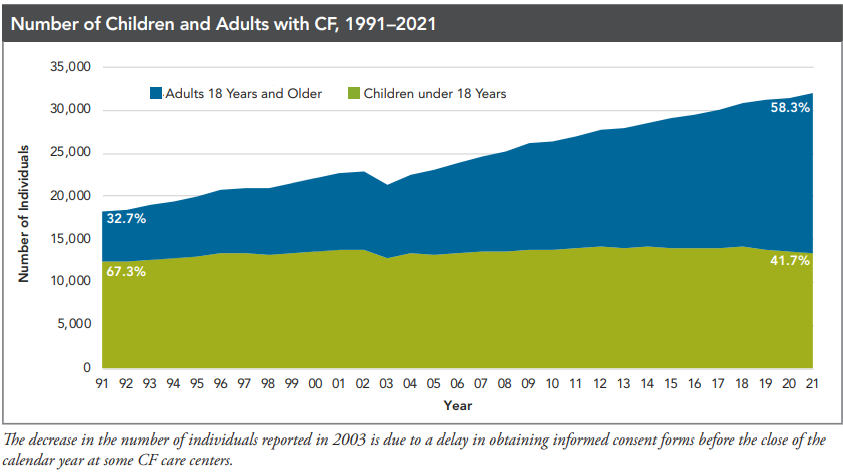
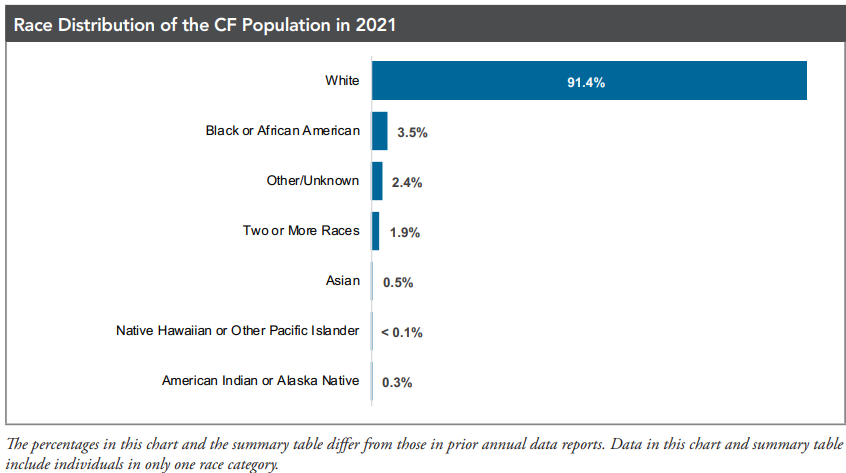
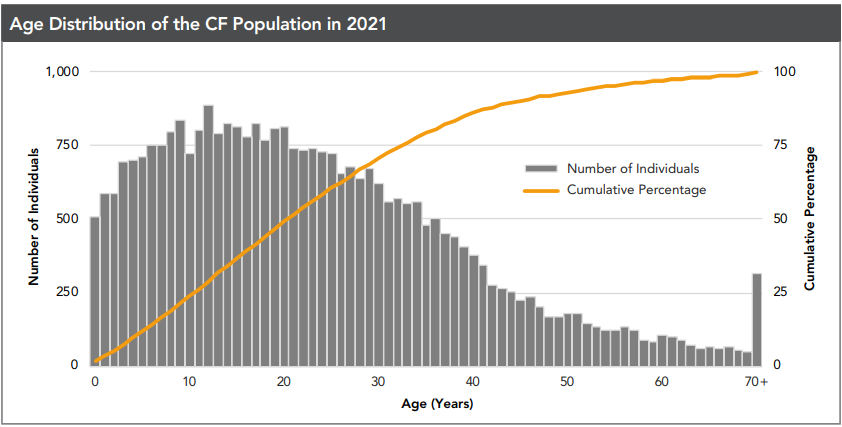

>> Mais informações, relatório de 2021: https://www.cff.org/sites/default/files/2021-11/Patient-Registry-Annual-Data-Report.pdf

- [Volte para o Sumário! (clique aqui)](#Sumário:)

### Dependências:
- [Volto para o Sumário!](#Sumário:)

- São as bibliotecas e pacotes usados.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import statsmodels as stm
import statsmodels.api as sm

import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
import pylab

### Carregando dados:
- [Volte para o Sumário! (clique aqui)](#Sumário:)

In [2]:
dados = pd.read_csv('fibrose.csv', sep=';', decimal='.')

In [3]:
dados.head()

Idade  Gen  OFT  Altura  Peso  PorMC      VR   CP  PME
0      7    0    1     109  13,1     68   24,51  137   95
1      7    1    1     112  12,9     65  38,165  134   85
2      8    0    1     124  14,1     64    44,1  147  100
3      8    1    1     125  16,2     67   19,89  124   85
4      8    0    1     127  21,5     93   19,19  104   95

- ⚠️ <b>Não foi passado como os dados foram coletados, a forma de amostragem ou as respectivas datas. É importante esta informação para encontrarmos viéses.</b>

### Análise exploratória dos dados:

- [Volto para o Sumário!](#Sumário:)

- Quais as dimensões dos dados?
    - 25 linhas;
    - 9 colunas;
    
- ⚠️ <b>Há muito poucas amostras de dados neste dataset.</b>
- ⚠️ <b>A relação quantidade de amostras e colunas é pequena. Isso significa que temos muitas colunas para poucas amostras. Podemos ter problema de generalização de modelos e uma alta dimensionalidade.</b>

In [4]:
dados.shape

(25, 9)

- Temos dados nulos?
    - Aparentemente não temos dados nulos;

In [5]:
dados.isnull().sum()

Idade     0
Gen       0
OFT       0
Altura    0
Peso      0
PorMC     0
VR        0
CP        0
PME       0
dtype: int64

- Quais são os tipos dos dados?

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Idade   25 non-null     int64 
 1   Gen     25 non-null     int64 
 2   OFT     25 non-null     int64 
 3   Altura  25 non-null     int64 
 4   Peso    25 non-null     object
 5   PorMC   25 non-null     int64 
 6   VR      25 non-null     object
 7   CP      25 non-null     int64 
 8   PME     25 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.9+ KB


- <b>Vamos gerar um relatório com pandas profilling dos dados, para facilitar e acelerar nossa análise:</b>
    - O relatório abaixo realiza boa parte da nossa EDA, porém vamos fazer passo a passo via código.

In [7]:
from ydata_profiling import ProfileReport

In [8]:
# Gerando o relatório dos dados
profile = ProfileReport(dados, title="Fibrose Cística", minimal=False)

In [9]:
# Expondo o relatório no notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- <b>Analisando variável a variável:</b>

In [10]:
dados.sample(5)

Idade  Gen  OFT  Altura  Peso  PorMC      VR   CP  PME
21     20    0    1     178    64     86      36  135  160
8      12    0    0     146  25,1     67   21,84  128   70
3       8    1    1     125  16,2     67   19,89  124   85
12     14    0    1     160  45,6     93    17,4  108  100
15     17    1    0     153  34,8     70  27,336  120  134

- <b>Idade:</b>
    - Seu tipo é numérica e inteira;
    - Não há dados nulos;
    - Min é 7, máx é 23 e a média é 14;

In [11]:
dados.Idade.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: Idade
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [12]:
dados.Idade.describe()

count    25.000000
mean     14.480000
std       5.058985
min       7.000000
25%      11.000000
50%      14.000000
75%      17.000000
max      23.000000
Name: Idade, dtype: float64

In [13]:
# Números que mais serepetem na idade
dados.Idade.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

Idade
23    12.0
20     4.0
19     8.0
17    16.0
16     4.0
15     4.0
14     8.0
13     8.0
12     8.0
11     4.0
9      4.0
8     12.0
7      8.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


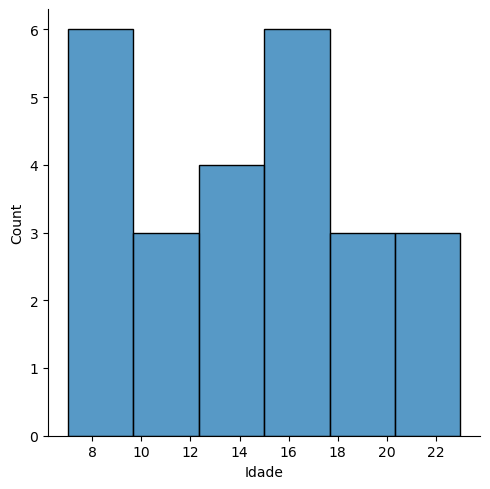

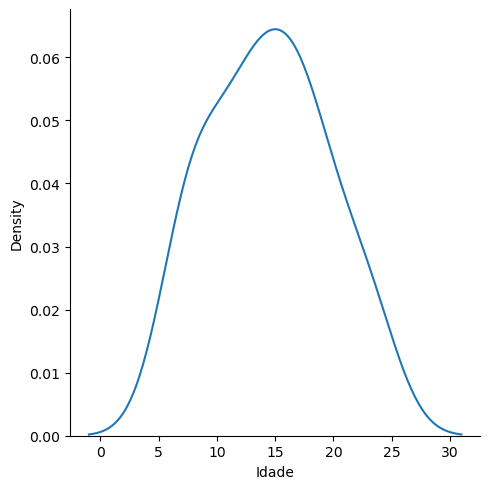

In [14]:
sb.displot(data=dados, x="Idade", kind='hist')
sb.displot(data=dados, x="Idade", kind='kde')

- <b>Gênero:</b>
    - Seu tipo é categórica e binária;
    - Não há dados nulos;
    - 1 44%, 0 56%;

In [15]:
dados.Gen.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: Gen
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [16]:
dados.Gen.describe()

count    25.000000
mean      0.440000
std       0.506623
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Gen, dtype: float64

In [17]:
# Números que mais serepetem na Gen
dados.Gen.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

Gen
1    44.0
0    56.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


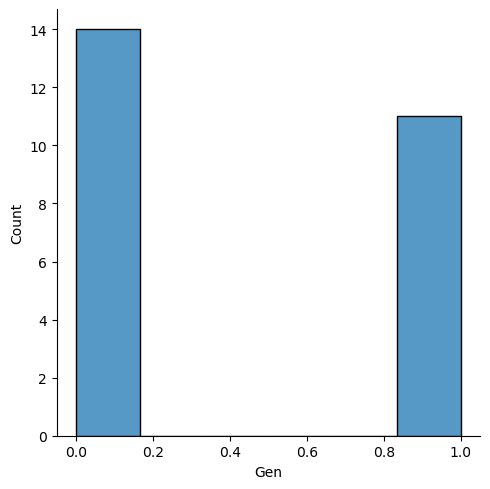

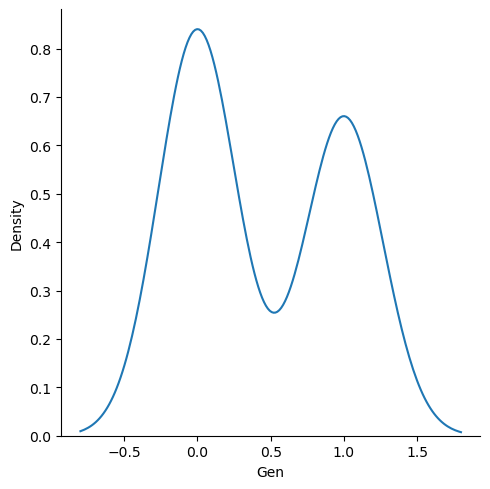

In [18]:
sb.displot(data=dados, x="Gen", kind='hist')
sb.displot(data=dados, x="Gen", kind='kde')

- <b>OFT:</b>
    - Seu tipo é categórica e binária;
    - Não há dados nulos;
    - 1 76%, 0 24%;

In [19]:
dados.OFT.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: OFT
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [20]:
dados.OFT.describe()

count    25.00000
mean      0.76000
std       0.43589
min       0.00000
25%       1.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: OFT, dtype: float64

In [21]:
# Números que mais serepetem na OFT
dados.OFT.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

OFT
1    76.0
0    24.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


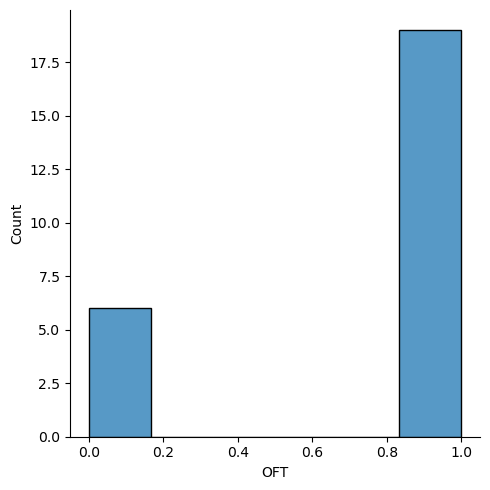

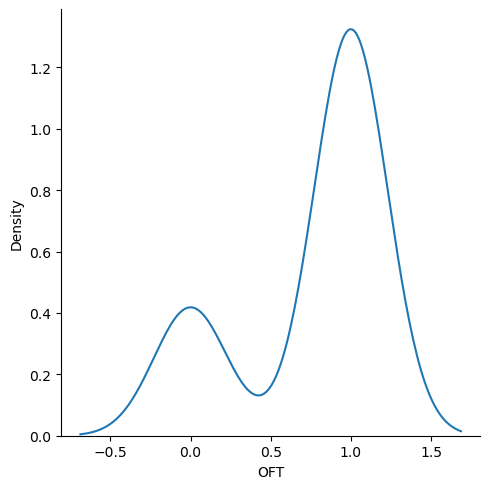

In [22]:
sb.displot(data=dados, x="OFT", kind='hist')
sb.displot(data=dados, x="OFT", kind='kde')

- <b>Altura:</b>
    - Seu tipo é inteira, medida em CM, podemos considerar como real;
    - Não há dados nulos;
    - Min 109, Max 180, mean 152.8 e std 21.5;

In [23]:
dados.Altura.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: Altura
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [24]:
dados.Altura.describe()

count     25.0
mean     152.8
std       21.5
min      109.0
25%      139.0
50%      156.0
75%      174.0
max      180.0
Name: Altura, dtype: float64

In [25]:
# Números que mais serepetem na Altura
dados.Altura.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

Altura
180    4.0
179    4.0
178    4.0
176    4.0
175    4.0
174    8.0
171    4.0
160    8.0
158    4.0
156    8.0
155    4.0
153    8.0
150    4.0
146    4.0
139    4.0
130    4.0
127    4.0
125    4.0
124    4.0
112    4.0
109    4.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


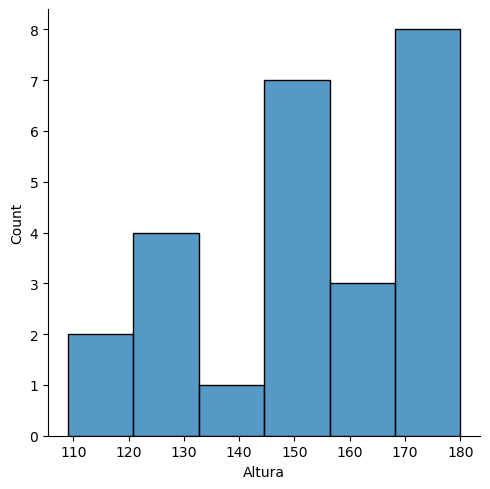

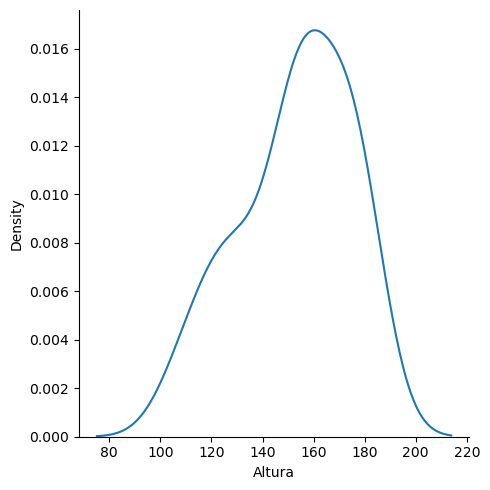

In [26]:
sb.displot(data=dados, x="Altura", kind='hist')
sb.displot(data=dados, x="Altura", kind='kde')

- <b>Peso:</b>
    - Peso está sendo interpretada como texto, vamos corrigir e convertê-la para real;
    - Seu tipo é real;
    - Não há dados nulos;
    - Min 12.9, Max 73.8, mean 38.4 e std 17.9;

In [27]:
dados.Peso = dados.Peso.apply(lambda e: float(e.replace(',','.')))

In [28]:
dados.Peso.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: Peso
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes


In [29]:
dados.Peso.describe()

count    25.000000
mean     38.404000
std      17.898126
min      12.900000
25%      25.100000
50%      37.200000
75%      51.100000
max      73.800000
Name: Peso, dtype: float64

In [30]:
# Números que mais serepetem no peso
dados.Peso.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

Peso
73.8    4.0
71.5    4.0
64.0    4.0
60.1    4.0
54.6    4.0
51.2    4.0
51.1    4.0
45.6    4.0
44.7    4.0
42.6    4.0
42.1    4.0
39.9    4.0
37.2    4.0
35.9    4.0
34.8    4.0
31.5    4.0
30.7    4.0
28.4    4.0
25.1    4.0
21.5    4.0
17.5    4.0
16.2    4.0
14.1    4.0
13.1    4.0
12.9    4.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


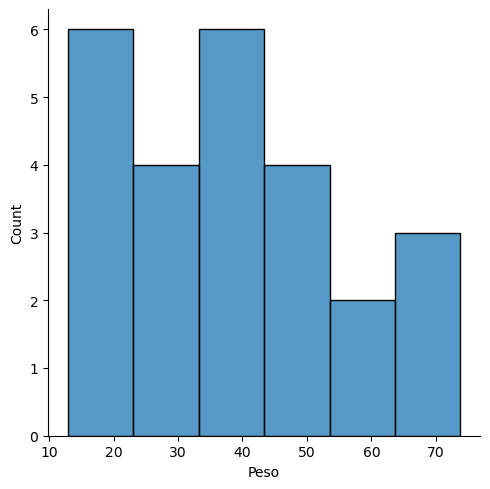

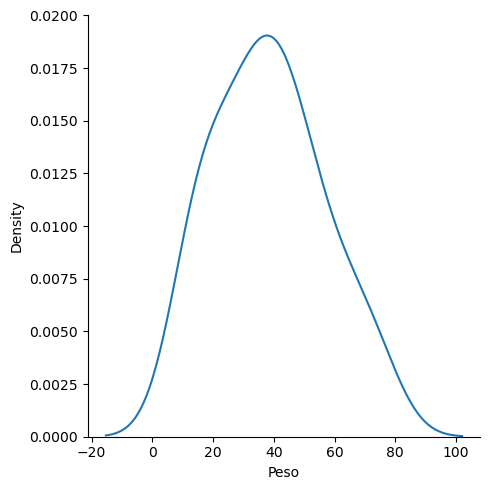

In [31]:
sb.displot(data=dados, x="Peso", kind='hist')
sb.displot(data=dados, x="Peso", kind='kde')

- <b>PorMC:</b>
    - Seu tipo é real;
    - Não há dados nulos;
    - Min 64, Max 97, mean 78.2 e std 12;

In [32]:
dados.PorMC.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: PorMC
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [33]:
dados.PorMC.describe()

count    25.000000
mean     78.280000
std      12.005277
min      64.000000
25%      68.000000
50%      71.000000
75%      90.000000
max      97.000000
Name: PorMC, dtype: float64

In [34]:
# Números que mais serepetem no PorMC
dados.PorMC.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

PorMC
97     4.0
95     4.0
93    12.0
92     4.0
90     4.0
89     8.0
86     8.0
72     4.0
71     4.0
70     8.0
69     8.0
68    12.0
67     8.0
66     4.0
65     4.0
64     4.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


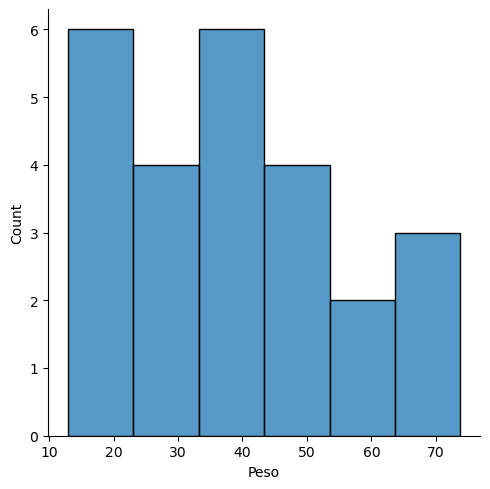

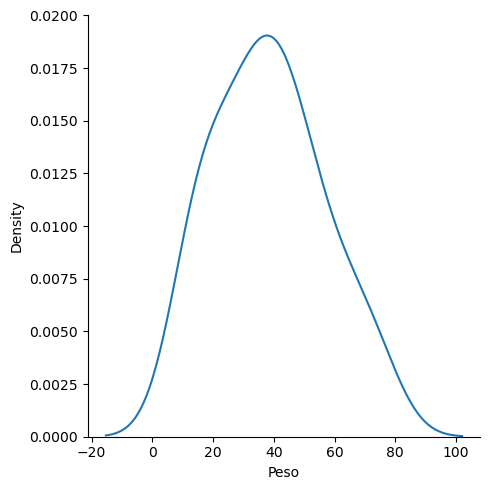

In [35]:
sb.displot(data=dados, x="Peso", kind='hist')
sb.displot(data=dados, x="Peso", kind='kde')

- <b>VR:</b>
    - VR está sendo interpretada como texto, vamos corrigir e convertê-la para real;
    - Seu tipo é real;
    - Não há dados nulos;
    - Min 12, Max 44, mean 38.4 e std 9;

In [36]:
dados.VR = dados.VR.apply(lambda e: float(e.replace(',','.')))

In [37]:
dados.VR.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: VR
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes


In [38]:
dados.VR.describe()

count    25.000000
mean     26.976160
std       9.419002
min      12.640000
25%      19.890000
50%      22.770000
75%      36.000000
max      44.100000
Name: VR, dtype: float64

In [39]:
# Números que mais serepetem
dados.VR.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

VR
44.100    4.0
43.875    4.0
40.590    4.0
40.468    4.0
39.235    4.0
38.165    4.0
36.000    4.0
30.855    4.0
28.215    4.0
27.336    4.0
24.640    4.0
24.510    4.0
22.770    4.0
22.660    4.0
22.560    4.0
22.360    4.0
21.840    4.0
21.280    4.0
19.890    4.0
19.825    4.0
19.190    4.0
18.360    4.0
17.400    4.0
15.640    4.0
12.640    4.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


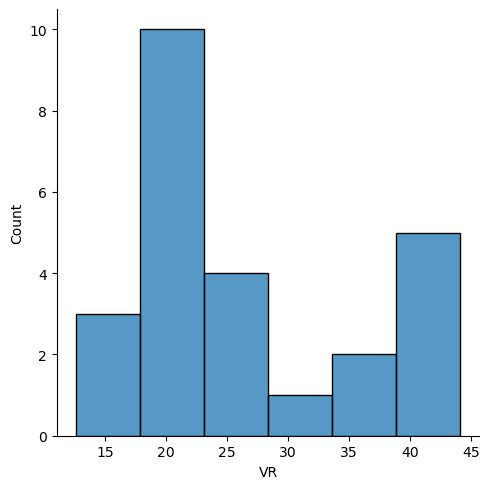

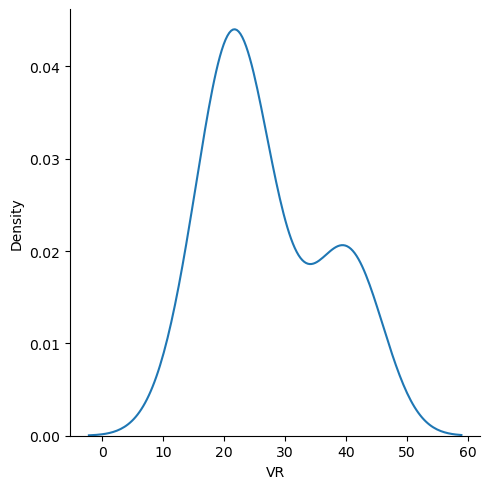

In [40]:
sb.displot(data=dados, x="VR", kind='hist')
sb.displot(data=dados, x="VR", kind='kde')

- <b>CP:</b>
    - Seu tipo é inteiro;
    - Não há dados nulos;
    - Min 81, Max 195, mean 117 e std 23;

In [41]:
dados.CP.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: CP
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [42]:
dados.CP.describe()

count     25.000000
mean     117.760000
std       23.227642
min       81.000000
25%      103.000000
50%      118.000000
75%      130.000000
max      195.000000
Name: CP, dtype: float64

In [43]:
# Números que mais serepetem
dados.CP.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

CP
195     4.0
147     4.0
137     4.0
136     4.0
135     4.0
134     4.0
130     4.0
128     4.0
124     4.0
121     4.0
120     4.0
119     4.0
118     4.0
113     4.0
108     4.0
104     4.0
103    12.0
101     8.0
98      4.0
95      4.0
90      4.0
81      4.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


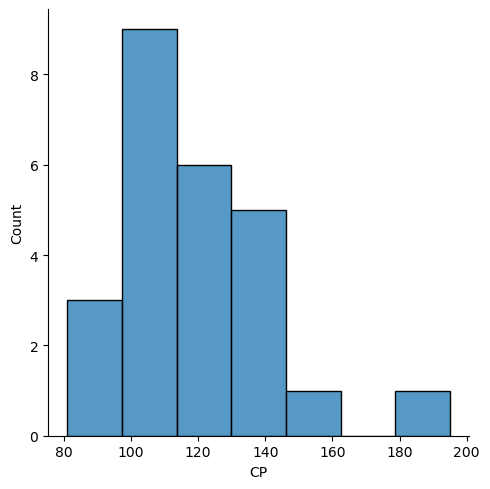

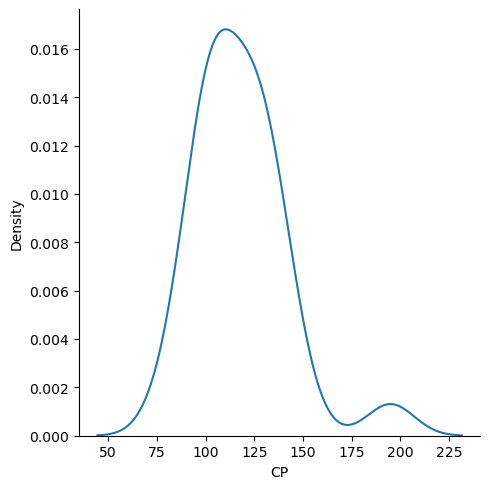

In [44]:
sb.displot(data=dados, x="CP", kind='hist')
sb.displot(data=dados, x="CP", kind='kde')

- <b>PME:</b>
    - Seu tipo é inteiro;
    - Não há dados nulos;
    - Min 65, Max 195, mean 109 e std 33;

In [45]:
dados.PME.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: PME
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [46]:
dados.PME.describe()

count     25.000000
mean     109.120000
std       33.436906
min       65.000000
25%       85.000000
50%       95.000000
75%      130.000000
max      195.000000
Name: PME, dtype: float64

In [47]:
# Números que mais serepetem
dados.PME.value_counts(dropna=False, normalize=True).sort_index(ascending=False)*100

PME
195     4.0
165     8.0
160     4.0
134     8.0
130     4.0
120     4.0
110     8.0
100     8.0
95     16.0
90      4.0
85     16.0
80      8.0
70      4.0
65      4.0
Name: proportion, dtype: float64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


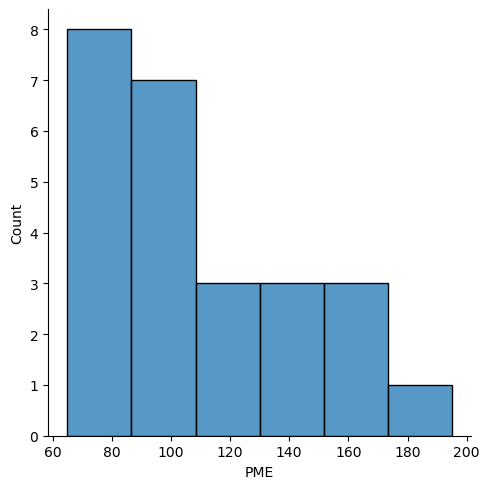

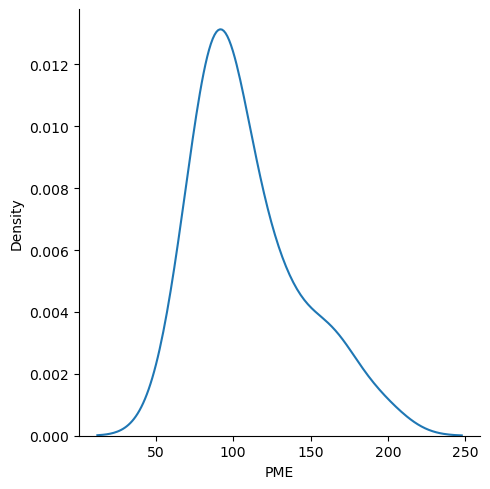

In [48]:
sb.displot(data=dados, x="PME", kind='hist')
sb.displot(data=dados, x="PME", kind='kde')

- Vamos entender a dispersão dos dados em gráficos:

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


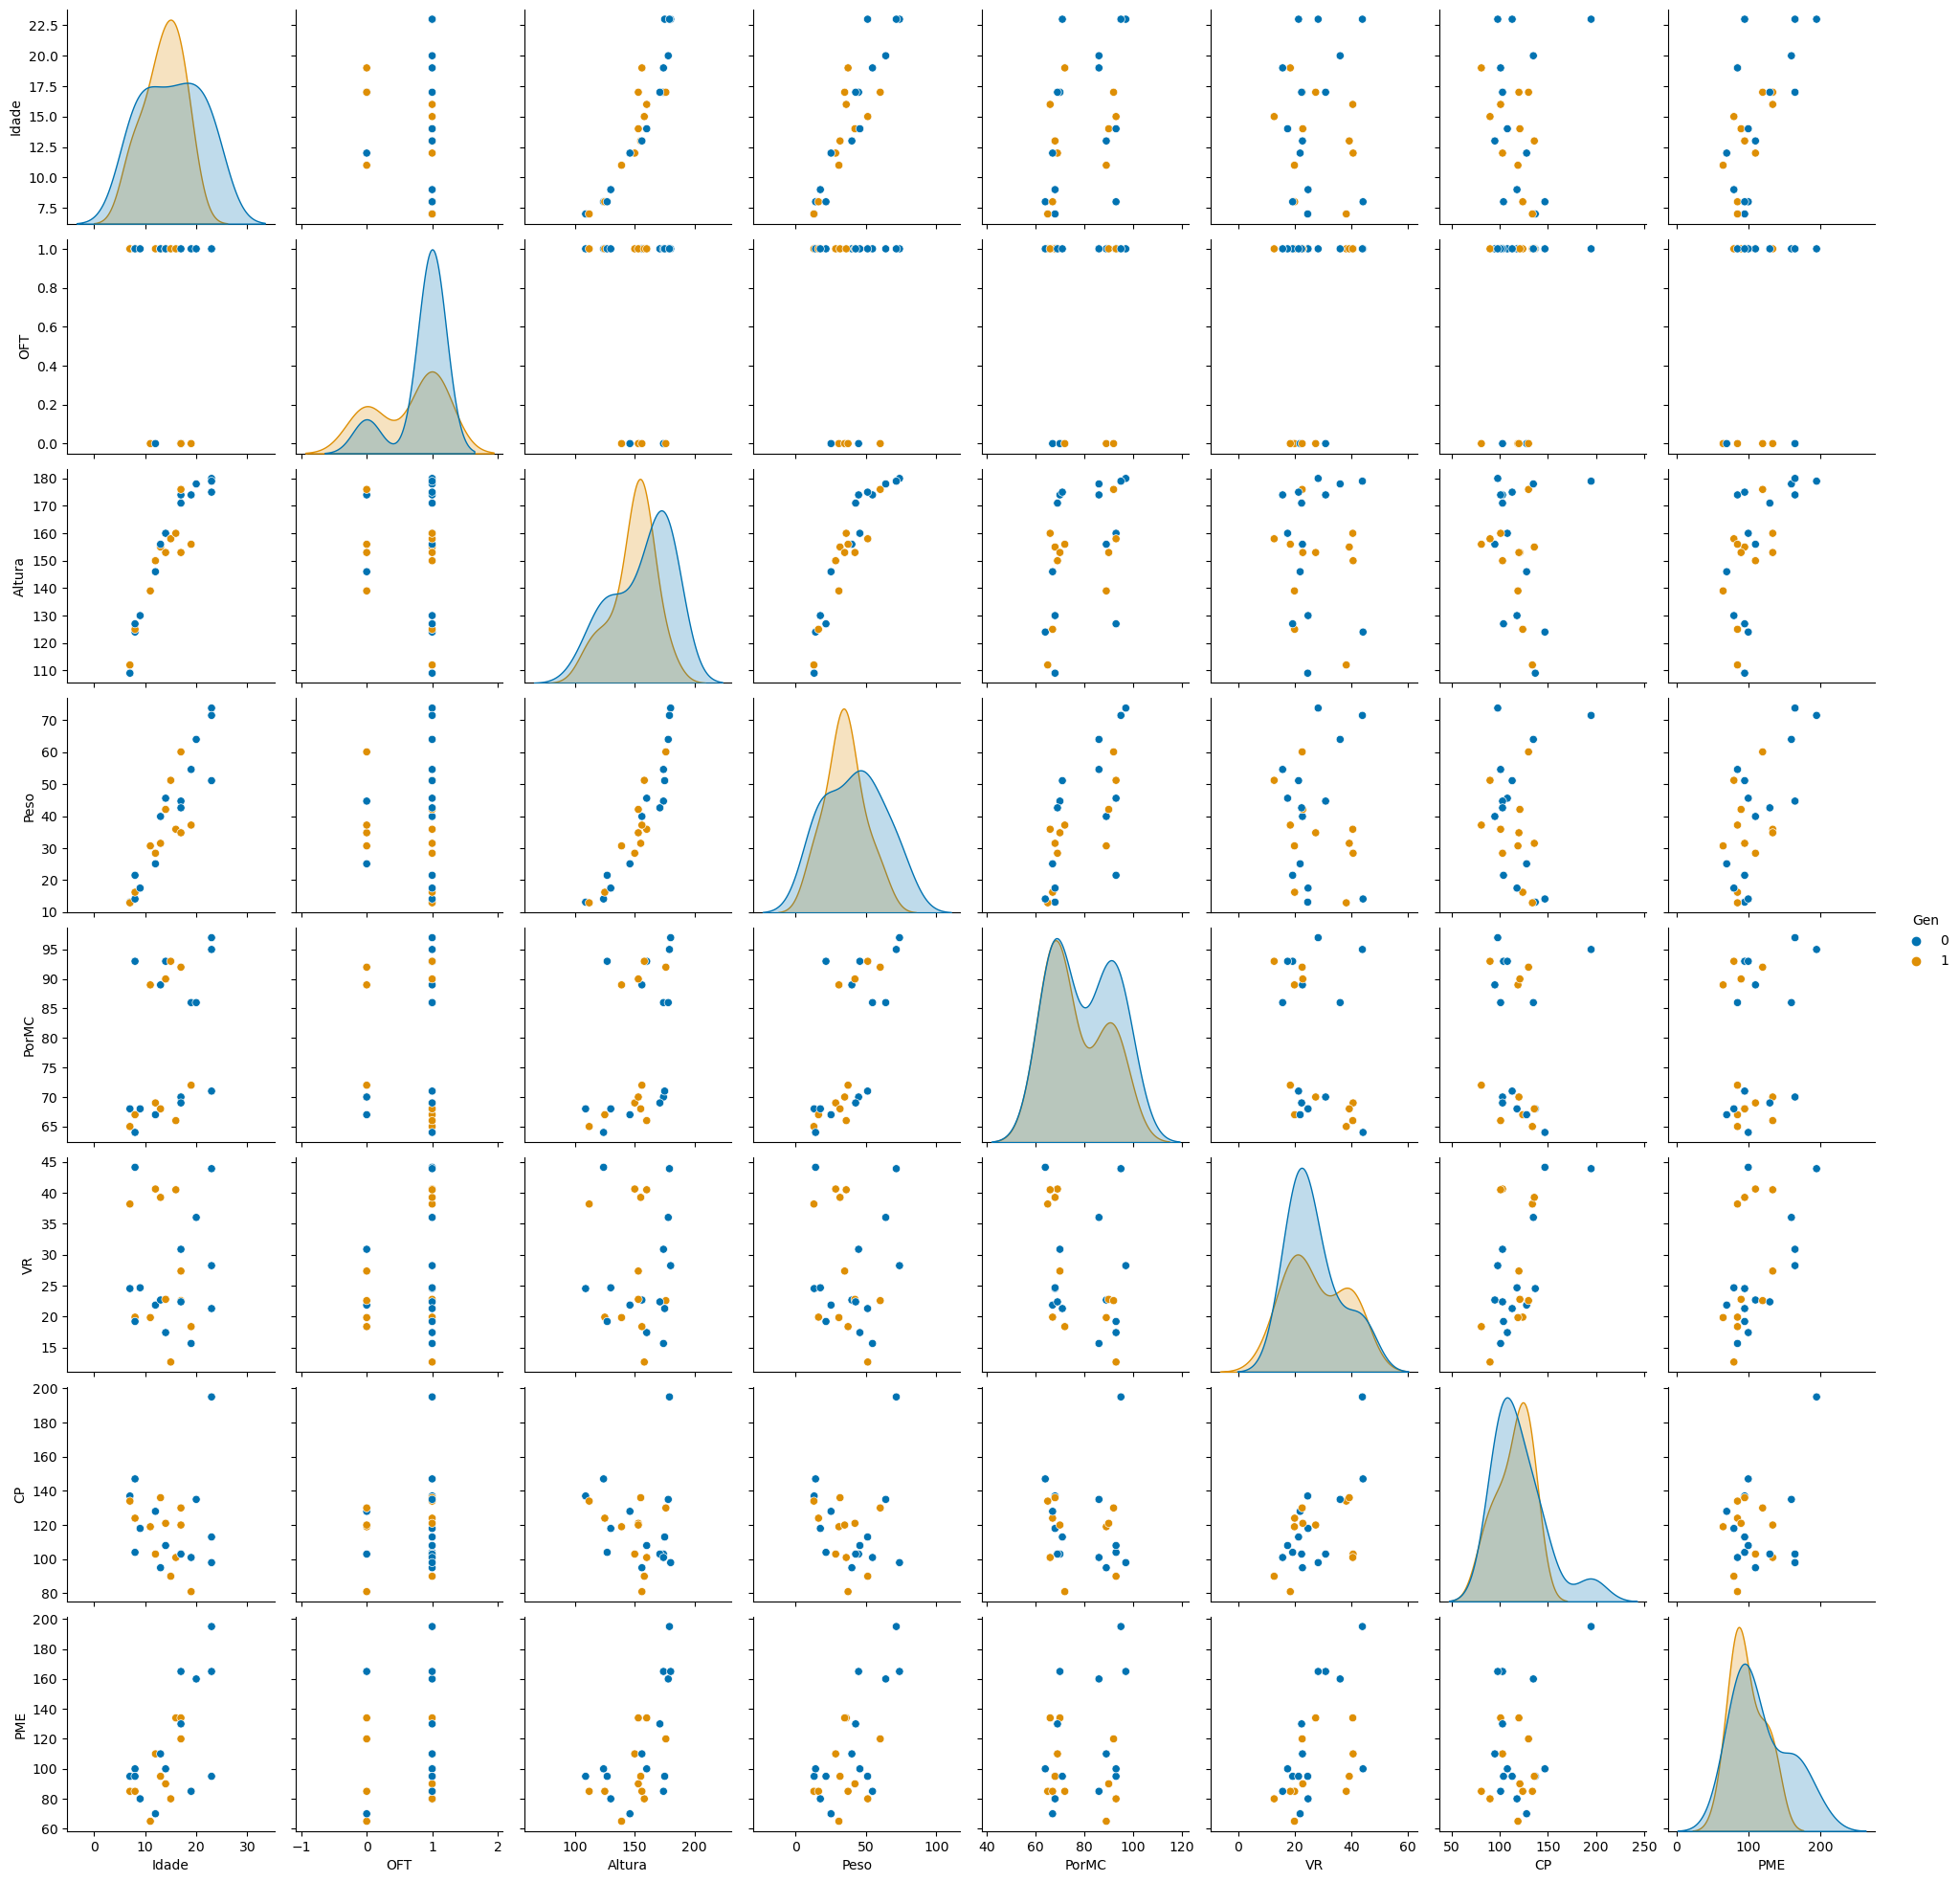

In [49]:
sb.pairplot(data=dados, hue='Gen', corner=False, palette='colorblind')

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


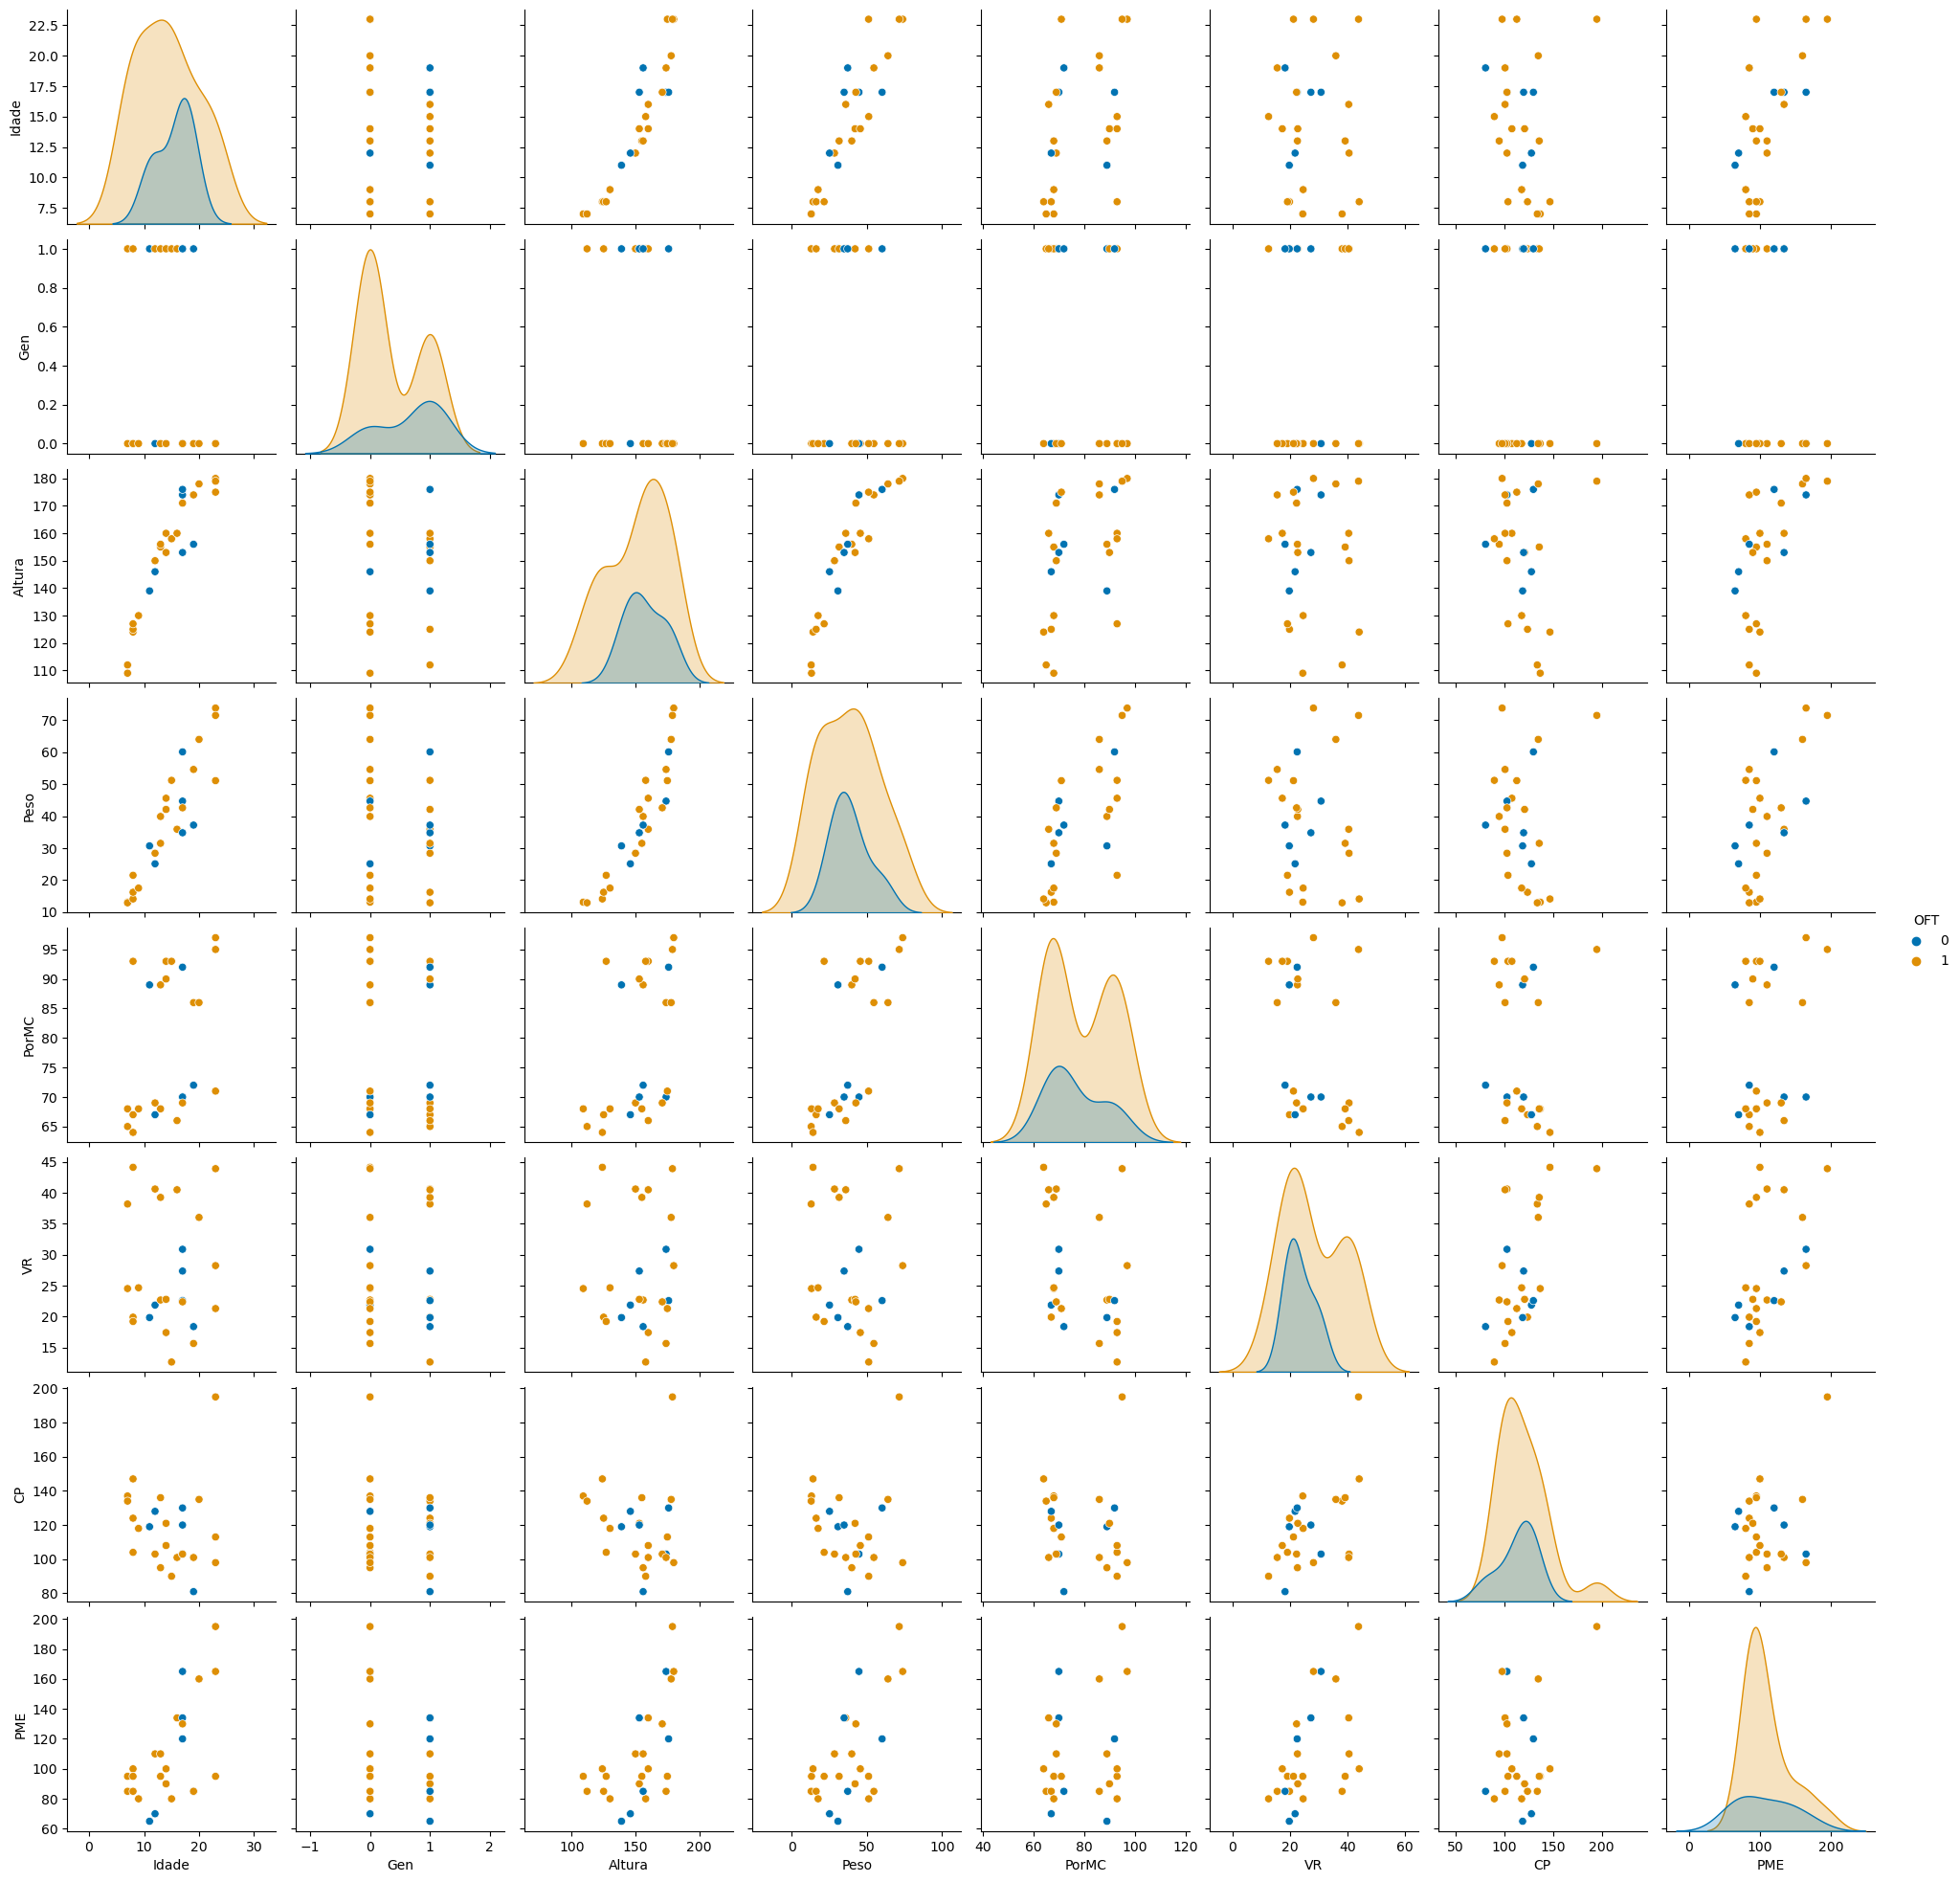

In [50]:
sb.pairplot(data=dados, hue='OFT', corner=False, palette='colorblind')

- As colunas de gênero e OFT parece não influenciar muito; Vamos entender mais visualizações;

- <b>Aplicando métodos de correlação:</b>

> Correlação de Pearson
>> Avalia relações lineares entre variáveis quantitativas. O coeficiente de correlação de Pearson varia de -1 a +1, e quando é +1, significa que quando uma variável aumenta, as outras variáveis aumentam de forma consistente. 
 
> Correlação de Spearman
>> - Pode ser entendida como uma correlação de Pearson aplicada aos postos das variáveis originais. O coeficiente de correlação de Spearman também varia de -1 a +1, e quanto mais próximo dos extremos, maior é a força da relação monotônica entre variáveis.
>> - Usado para medir a força de uma relação monotônica entre duas variáveis, especialmente quando a relação é não linear ou as variáveis ​​têm uma distribuição não gaussiana. A correlação de Spearman também é usada ao avaliar relações envolvendo variáveis ​​ordinais.
 
> Correlação de Kendall
>> - É uma estatística baseada no número de inversões dos postos de uma das variáveis, quando os postos da outra variável estão ordenados. O coeficiente de correlação de Kendall é calculado a partir da fórmula tau = (C - D) / (n * (n - 1) / 2), onde C é o número de pares concordantes, D é o número de pares discordantes e n é o número de observações. 
>> - Por ser um teste não-paramétrico, a correlação de Kendall pode ser usada com dados categóricos ordinais e quando não há distribuição normal dos dados.
 

- Correlação de pearson:

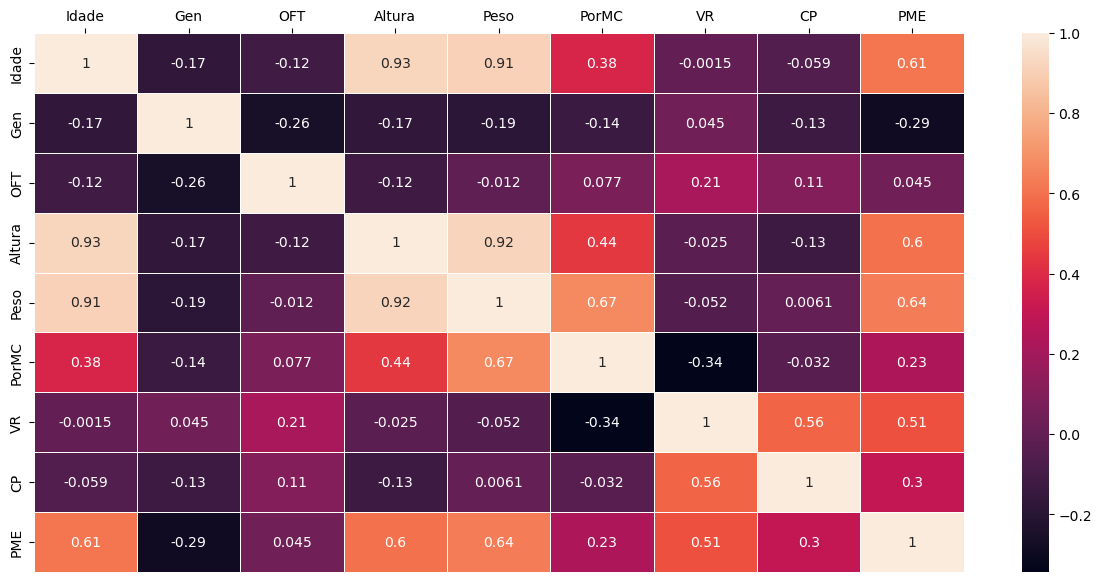

In [51]:
fig, ax = plt.subplots(figsize=(15,7)) 
ax = sb.heatmap(dados.corr(method='pearson'), annot=True, linewidth=.5, ax=ax)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

- ⚠️ <b>Há fortes relações lineares entre:</b>
    - Idade e altura;
    - Idade e peso;
    - Altura e peso;
    - Podemos trocar idade, altura e peso por uma única variável que relacione estas três;
    - PorMC é bem relacionado linearmente com Peso;
    - VR e CP são bem correlacionados linearmente;
    - Pode relacionar VR e CP em uma única variável; 

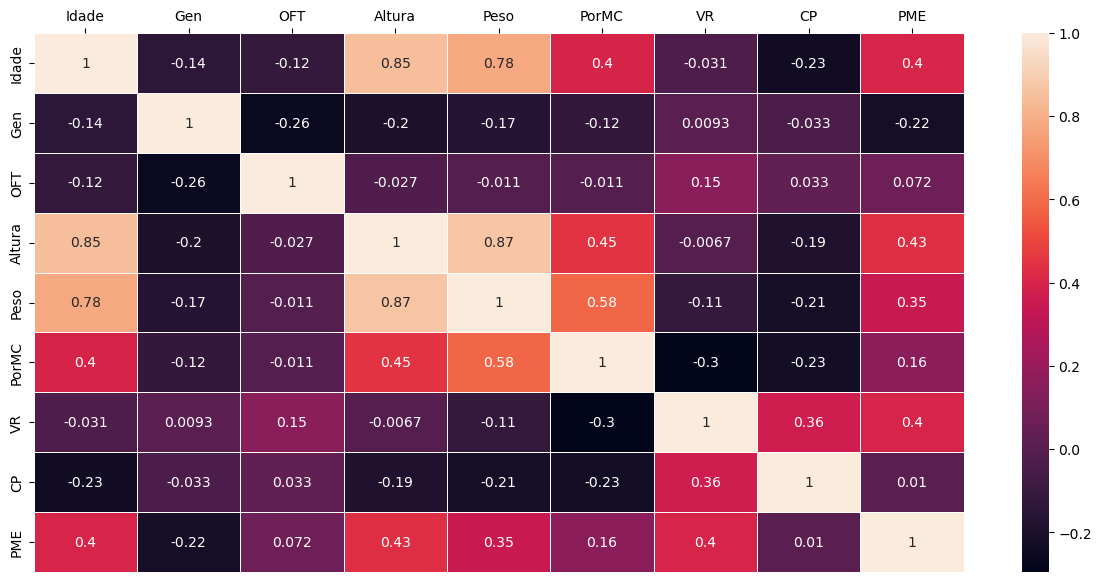

In [52]:
fig, ax = plt.subplots(figsize=(15,7)) 
ax = sb.heatmap(dados.corr(method='kendall'), annot=True, linewidth=.5, ax=ax)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

- ⚠️ <b>Há relações não lineares, e a descorrelação não monotônca que víamos em pearson:</b>
    - PME e CP deixam de ter correlação forte;
    - PorMC atenua em relação a PME;

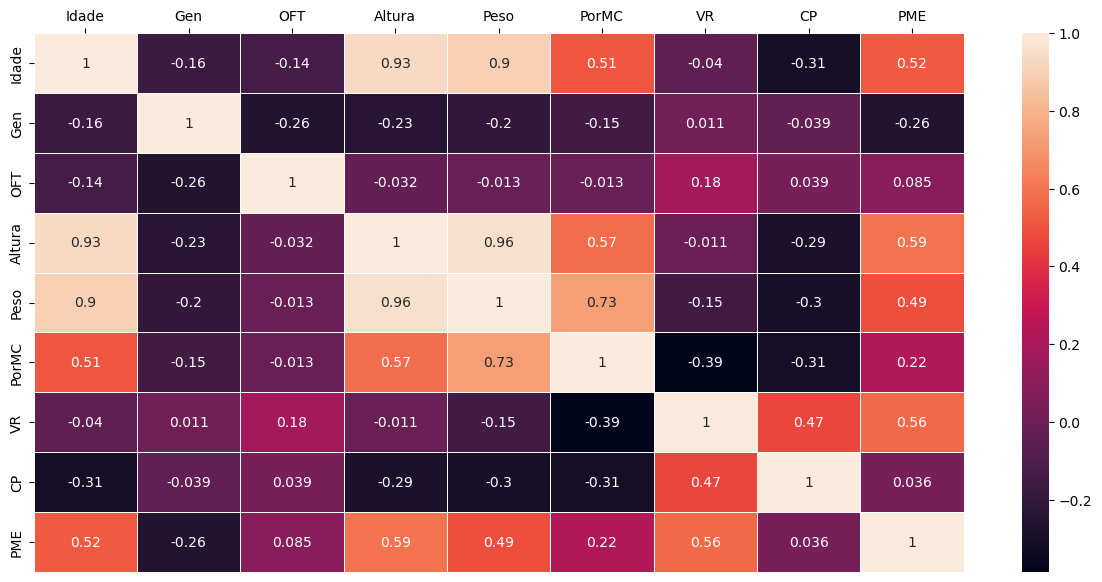

In [53]:
fig, ax = plt.subplots(figsize=(15,7)) 
ax = sb.heatmap(dados.corr(method='spearman'), annot=True, linewidth=.5, ax=ax)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

- ⚠️ <b>Hipóteses:</b>
    - Podemos trocar idade, altura e peso por IMC;
    - Podemos trocar PorMC, VR e CP por uma única variável que as relacione;
        - VR e CP estão correlacionados inversamente com PorMC;
    - Gen e OFT podem ser combinadas em uma única variável dummy;
        - (0) Gen 0 e OFT 0;
        - (1) Gen 0 e OFT 1;
        - (2) Gen 1 e OFT 0;
        - (3) Gen 1 e OFT 1;
    - PorMC atenua em relação a PME;

- Interações esperadas nos dados:
    - 1. Gen: Gênero. Mulher: 1, Homem 0.
    - 2. OFT: Algum familiar já teve? Sim: 1, Não: 0.
    - 3. Idade: Idade.
    - 4. Altura.
    - 5. Peso.
    - 6. PorMC: Porcentagem de massa corporal.
    - 7. VR: Volume residual do pulmão.
    - 8. CP: Capacidade pulmonar.
    - 9. PME: Pressão máxima expiratória (quando se expira ao respirar).

### Hipóteses:

- [Volto para o Sumário!](#Sumário:)

- <b>Levantando hipóteses para responder na próxima sessão de dados:</b>
    - Acima temos os metadados, o que podemos esperar e hipóteses que podemos investigar:
        - A fibrose atinge homens e mulheres na mesma proporção, então talvez a variável gênero não seja relevante;
            - Vamos verificar essa hipótese;
            - Qual será o comportamento entre gênero e PME?
        - A fibrose cística é uma doença que possui componente genética muito forte, portanto, como os dados trazem pessoas que possuem fibrose, temos que entender sua relação com PME.
        - Idade, altura e peso estão correlacionadas. Como estamos falando de uma amostra de pessoas mais jovens, espera-se que estejam em fase de crescimento, logo elas podem estar fortemente correlacionadas e podem ser motivos de <b>multicorrelação</b>.
        - PorMC e correlacionado com peso e altura;
        - CP e VR são inversament proporcionais;
        - Muitas variáveis se explicam nestes dados;
            - Podemos combinar variáveis para compactar a informação;

In [54]:
dados.head()

Idade  Gen  OFT  Altura  Peso  PorMC      VR   CP  PME
0      7    0    1     109  13.1     68  24.510  137   95
1      7    1    1     112  12.9     65  38.165  134   85
2      8    0    1     124  14.1     64  44.100  147  100
3      8    1    1     125  16.2     67  19.890  124   85
4      8    0    1     127  21.5     93  19.190  104   95

- Genero afeta PME?
    - Parece não afetar muito;

<Axes: xlabel='Gen', ylabel='PME'>

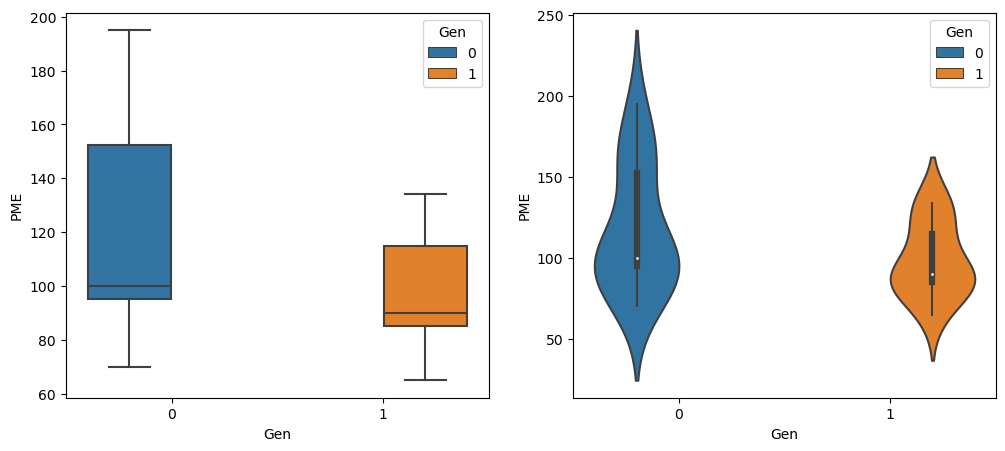

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sb.boxplot(data=dados, x='Gen', y='PME', hue="Gen", ax=ax[0])
sb.violinplot(data=dados, x='Gen', y='PME', hue="Gen", ax=ax[1])

- OFT afeta PME?
    - Parece não afetar muito também;

<Axes: xlabel='OFT', ylabel='PME'>

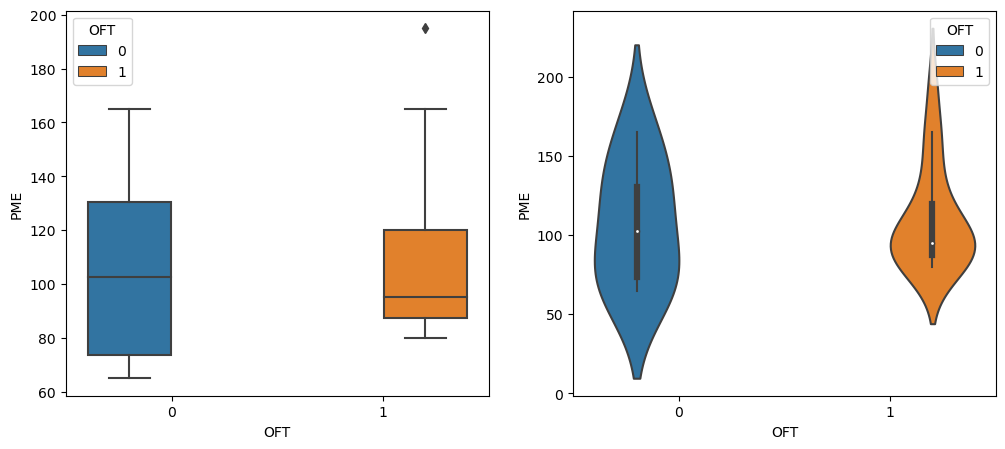

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sb.boxplot(data=dados, x='OFT', y='PME', hue="OFT", ax=ax[0])
sb.violinplot(data=dados, x='OFT', y='PME', hue="OFT", ax=ax[1])

- Combinando as categorias:
    - (0) Gen 0 e OFT 0;
    - (1) Gen 0 e OFT 1;
    - (2) Gen 1 e OFT 0;
    - (3) Gen 1 e OFT 1;
- Existe uma correlação inversa entre os grupos;

In [57]:
dados['gen_oft'] = 0

filtro_gen_oft0 = (dados.Gen==0) & (dados.OFT==0)
filtro_gen_oft1 = (dados.Gen==0) & (dados.OFT==1)
filtro_gen_oft2 = (dados.Gen==1) & (dados.OFT==0)
filtro_gen_oft3 = (dados.Gen==1) & (dados.OFT==1)

dados.loc[(filtro_gen_oft0),'gen_oft'] = 0
dados.loc[(filtro_gen_oft1),'gen_oft'] = 1
dados.loc[(filtro_gen_oft2),'gen_oft'] = 2
dados.loc[(filtro_gen_oft3),'gen_oft'] = 3

<Axes: xlabel='gen_oft', ylabel='PME'>

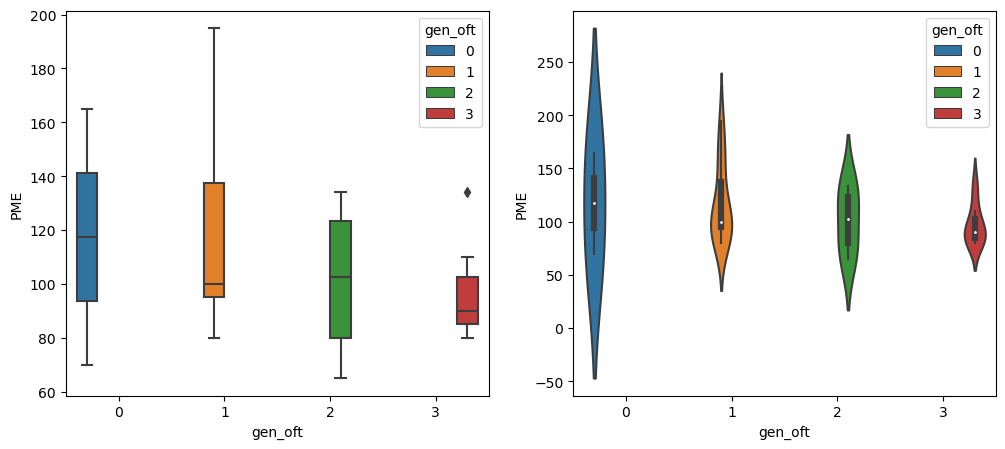

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sb.boxplot(data=dados, x='gen_oft', y='PME', hue="gen_oft", ax=ax[0])
sb.violinplot(data=dados, x='gen_oft', y='PME', hue="gen_oft", ax=ax[1])

- Idade e PME:

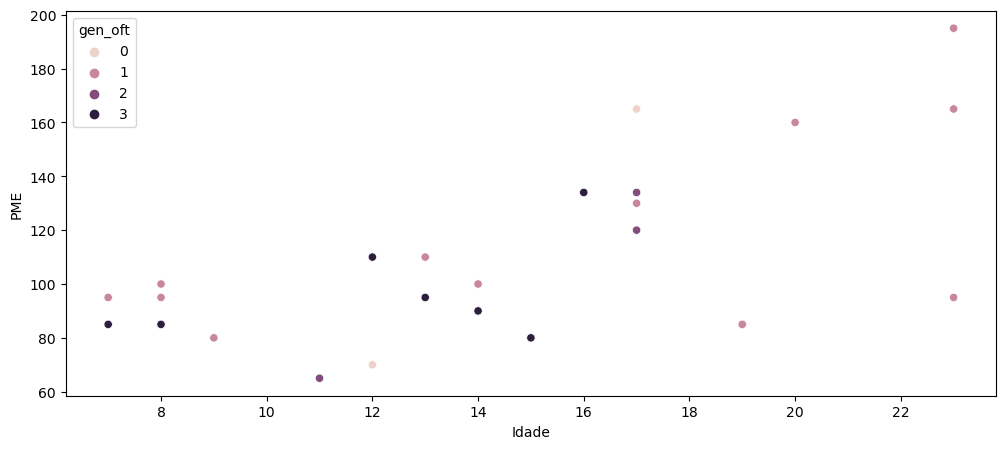

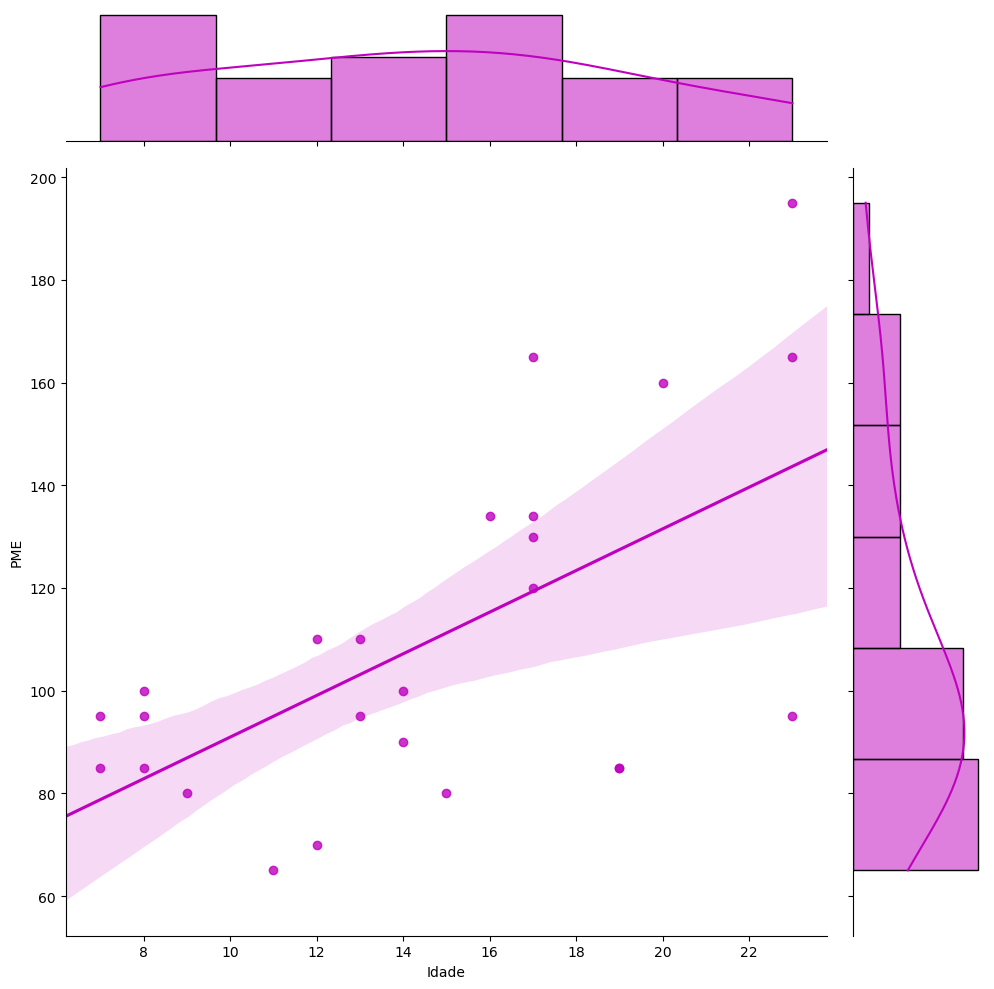

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='Idade', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='Idade', y='PME', kind='reg', truncate=False, color="m", height=10)

- Altura e PME:

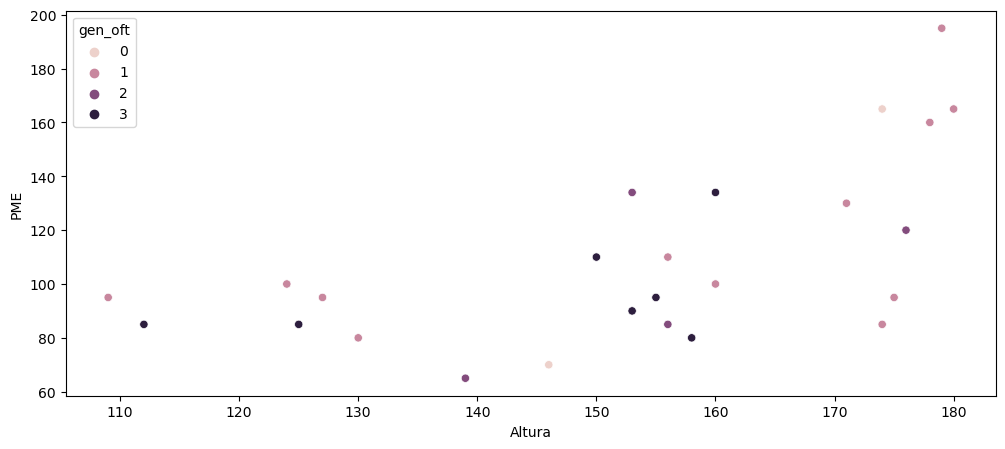

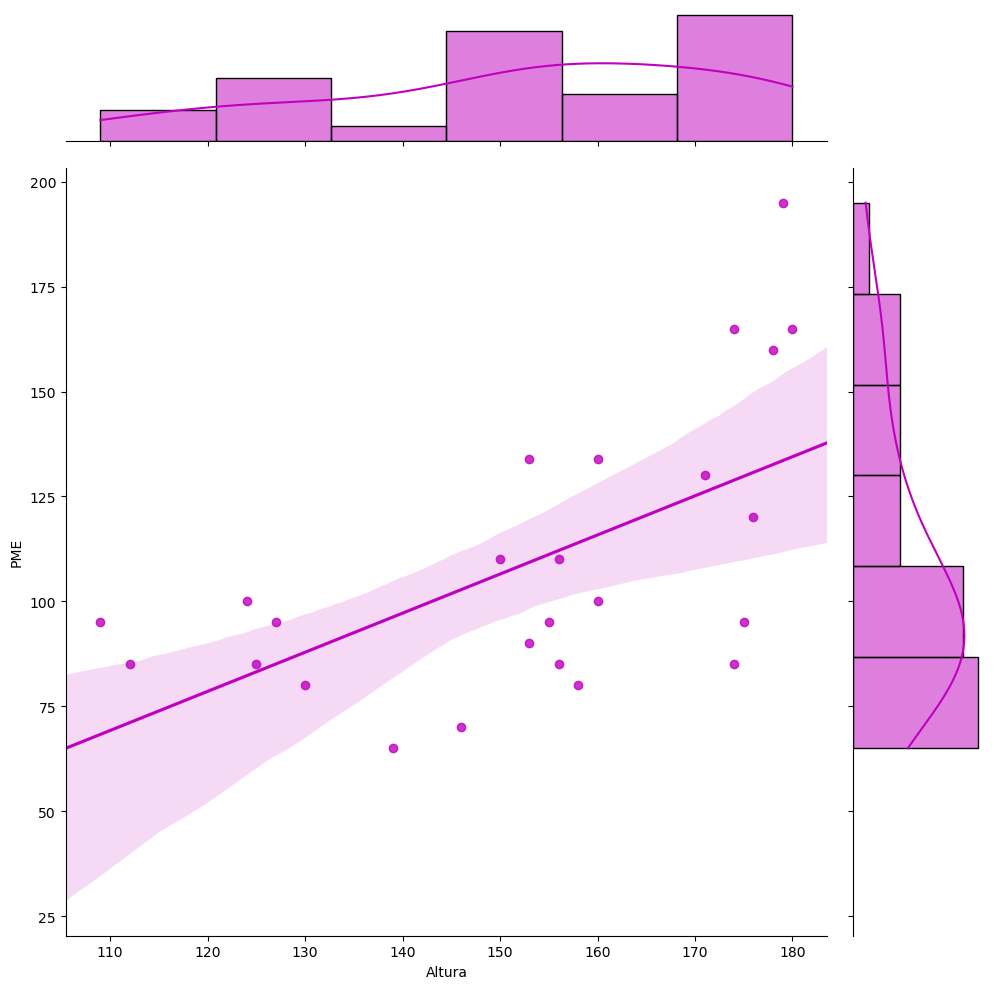

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='Altura', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='Altura', y='PME', kind='reg', truncate=False, color="m", height=10)

- Peso e PME:

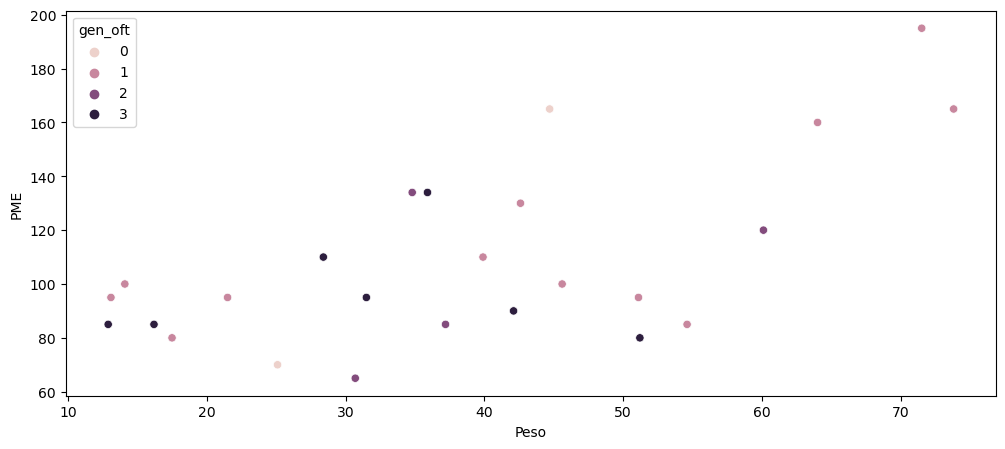

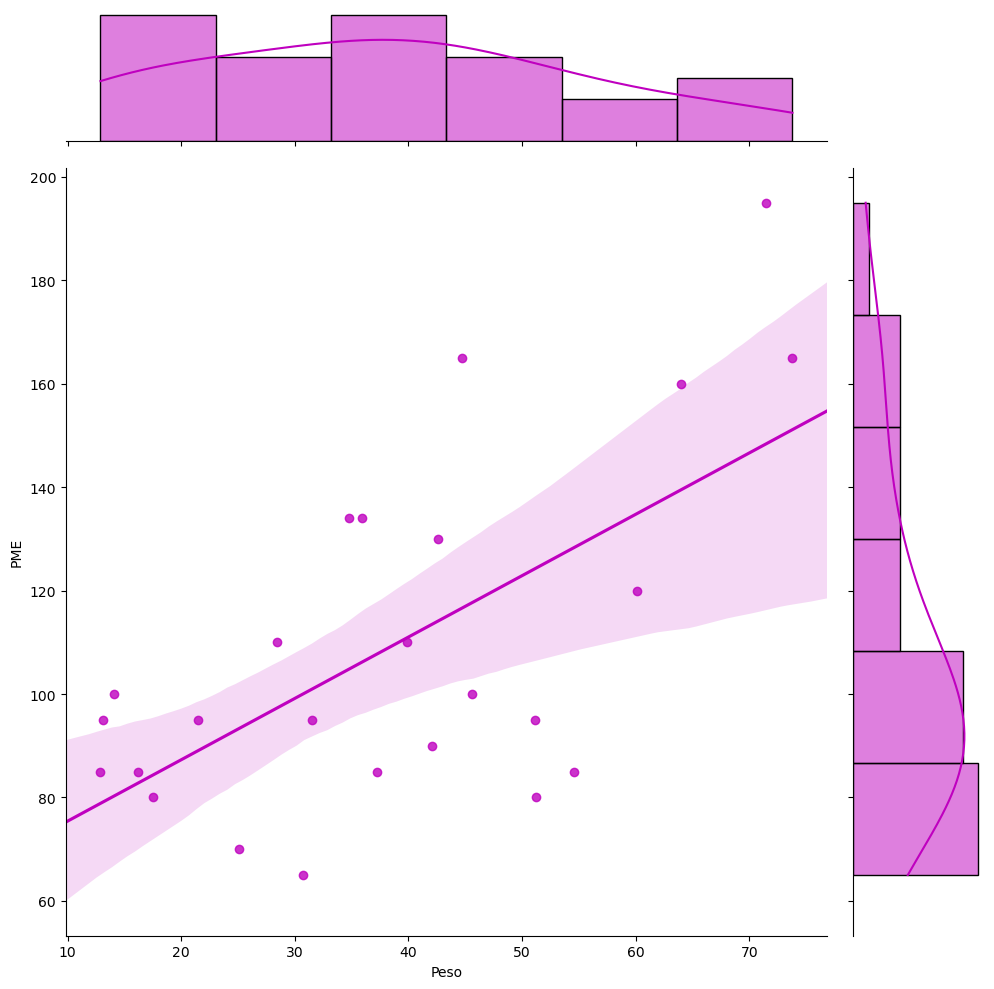

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='Peso', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='Peso', y='PME', kind='reg', truncate=False, color="m", height=10)

- PorMC e PME:

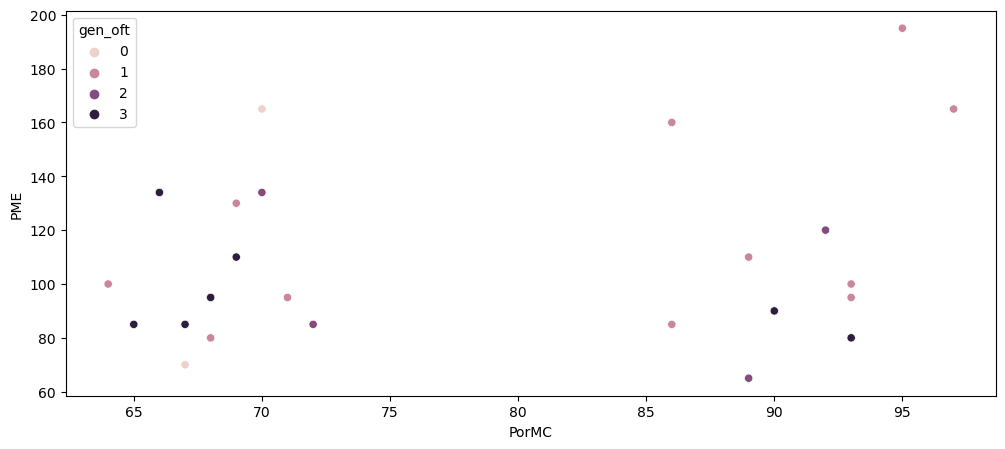

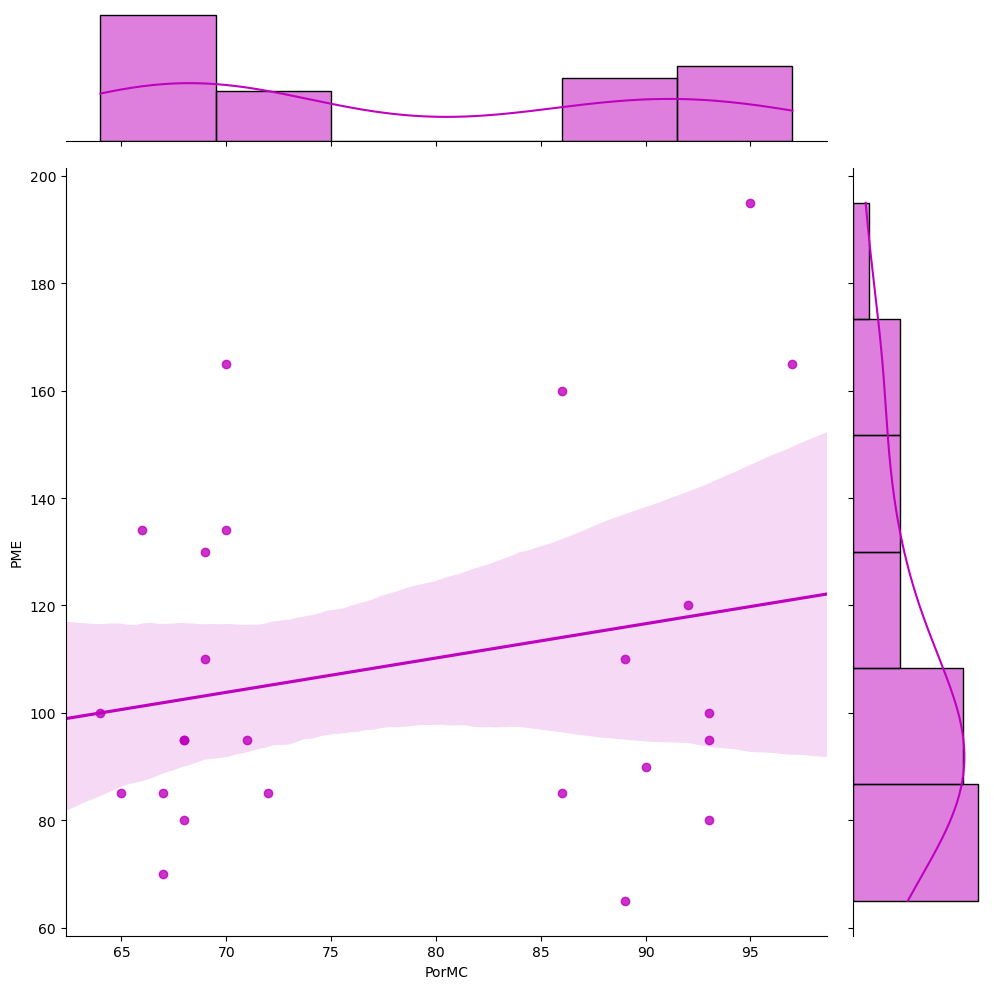

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='PorMC', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='PorMC', y='PME', kind='reg', truncate=False, color="m", height=10)

- VR e PME:

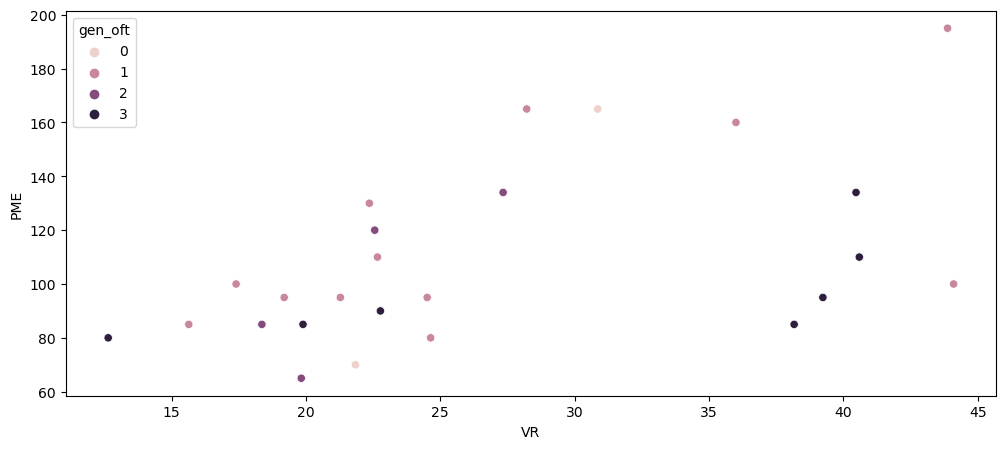

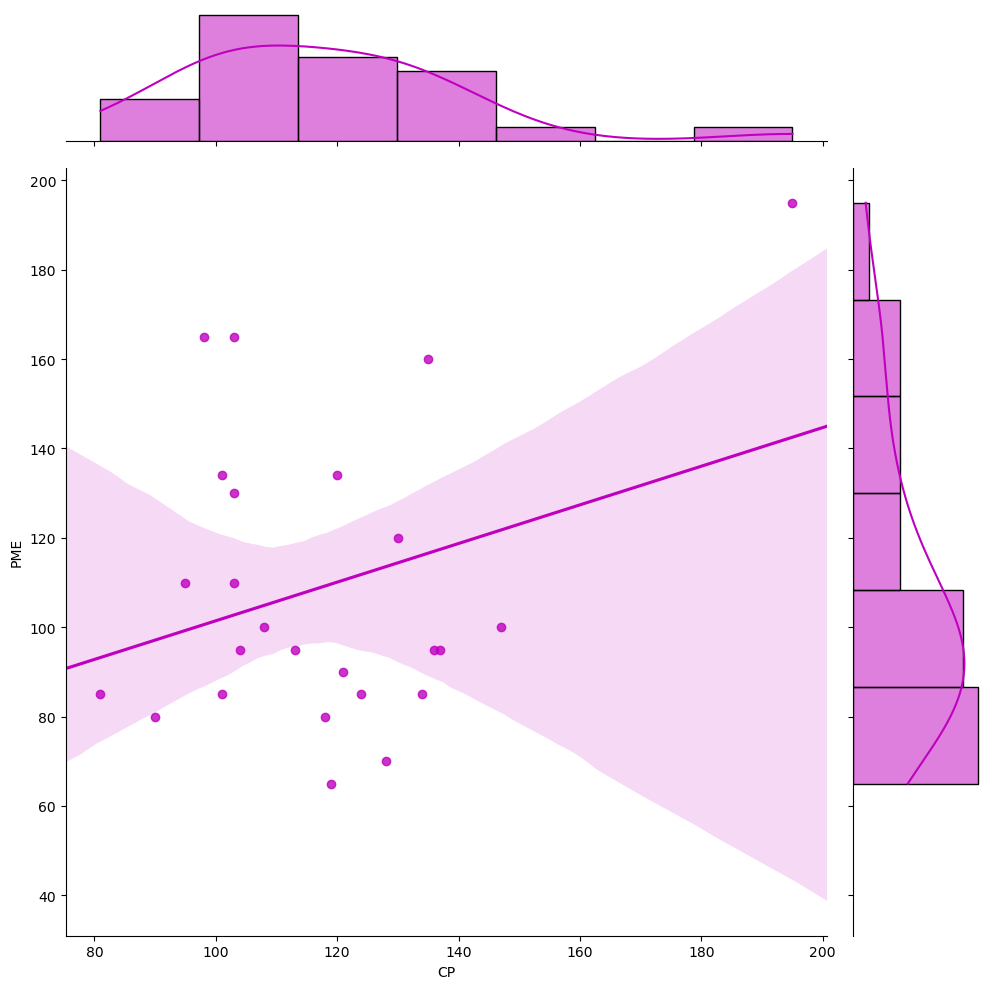

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='VR', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='CP', y='PME', kind='reg', truncate=False, color="m", height=10)

- CP e PME:
    - Relação influenciada por outliers;

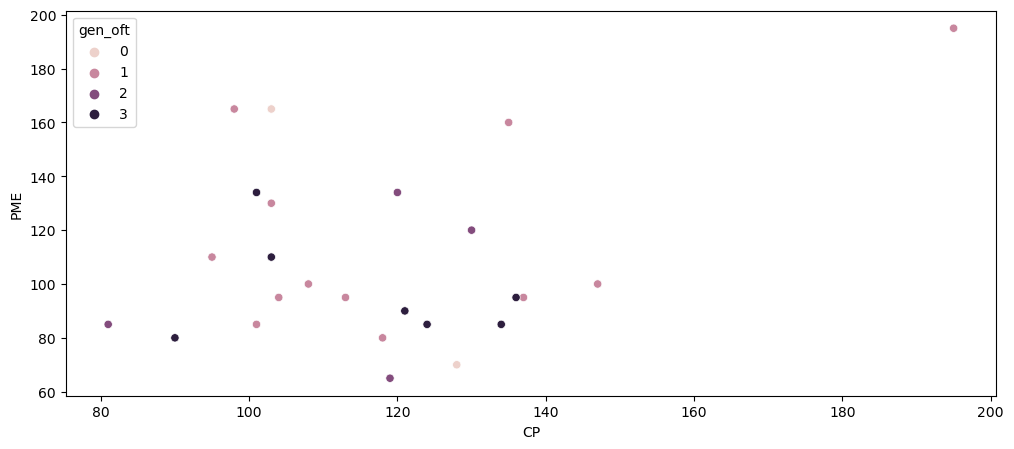

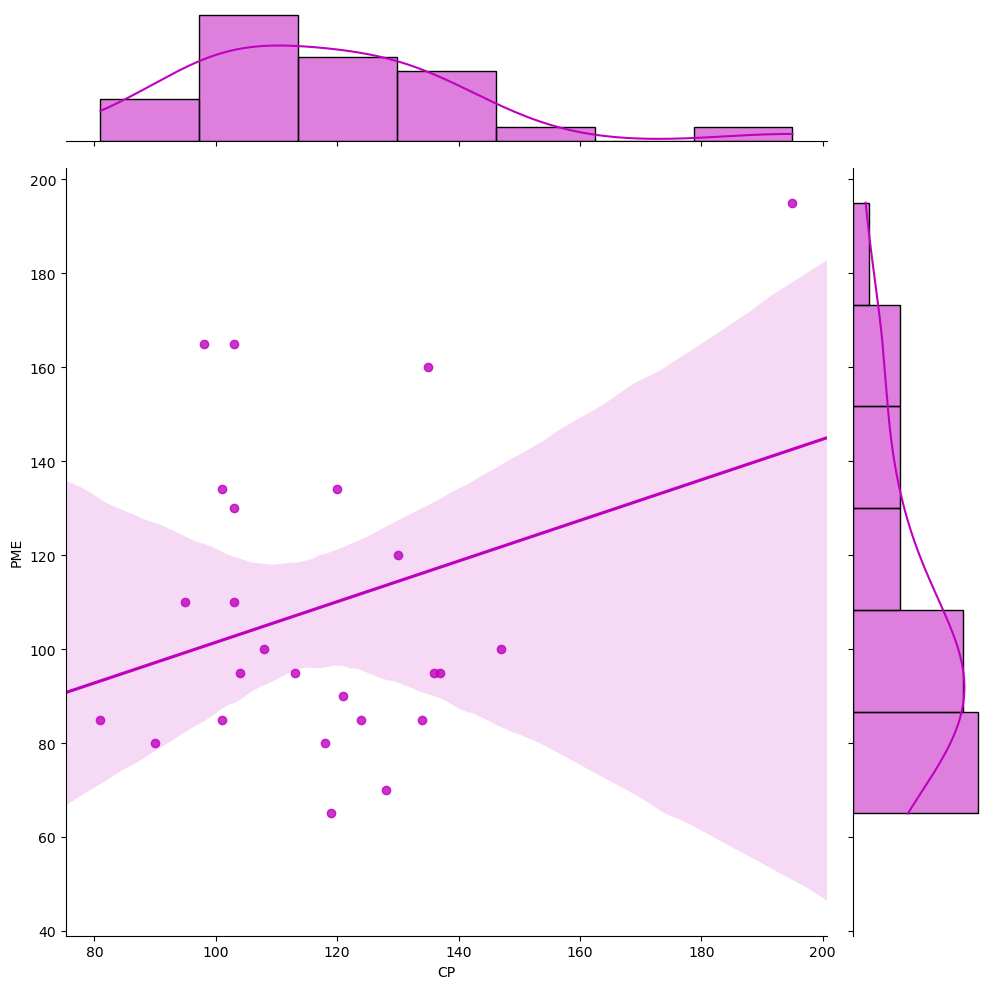

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='CP', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='CP', y='PME', kind='reg', truncate=False, color="m", height=10)

### Criação de variáveis:

- [Volto para o Sumário!](#Sumário:)

- Já criamos a variável que combina os grupos de Gênero e OFT, que chamamos de gen_oft;

- Vamos criar a variável IMC:
    - Combinando peso e altura;

In [65]:
dados['imc'] = dados.Peso/((dados.Altura/100)**2)

- Vamos criar uma variável que relaciona PorMC, VR e CP:
    - PorMC: Porcentagem de massa corporal.
    - VR: Volume residual do pulmão.
    - CP: Capacidade pulmonar
    - PorMC é inversamente proporcional com VR: $PorMC \sim \frac{1}{VR}$;
    - PorMC é inversamente proporcional com CP: $PorMC \sim \frac{1}{CP}$;
    - Vamos tentar: $$PP=\frac{PorMC^{2}}{VR*CP}$$

In [66]:
dados['PP'] = dados.PorMC**2/(dados.VR*dados.CP)

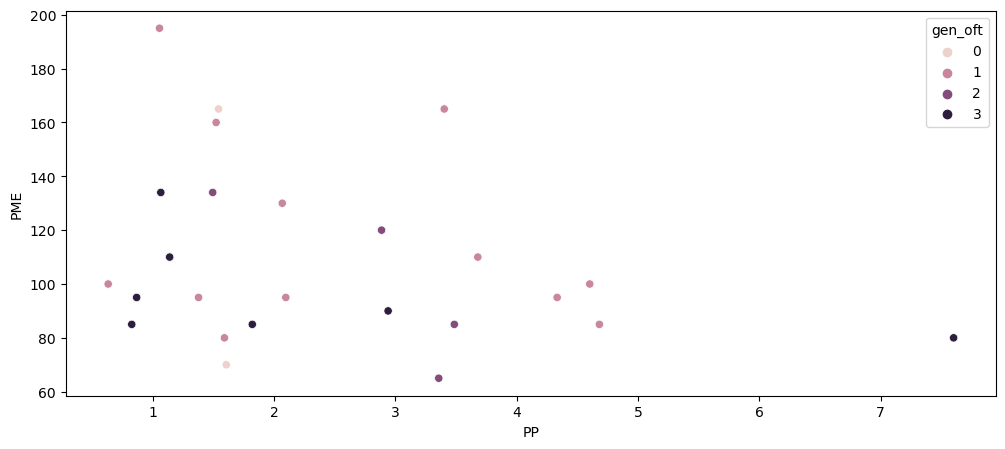

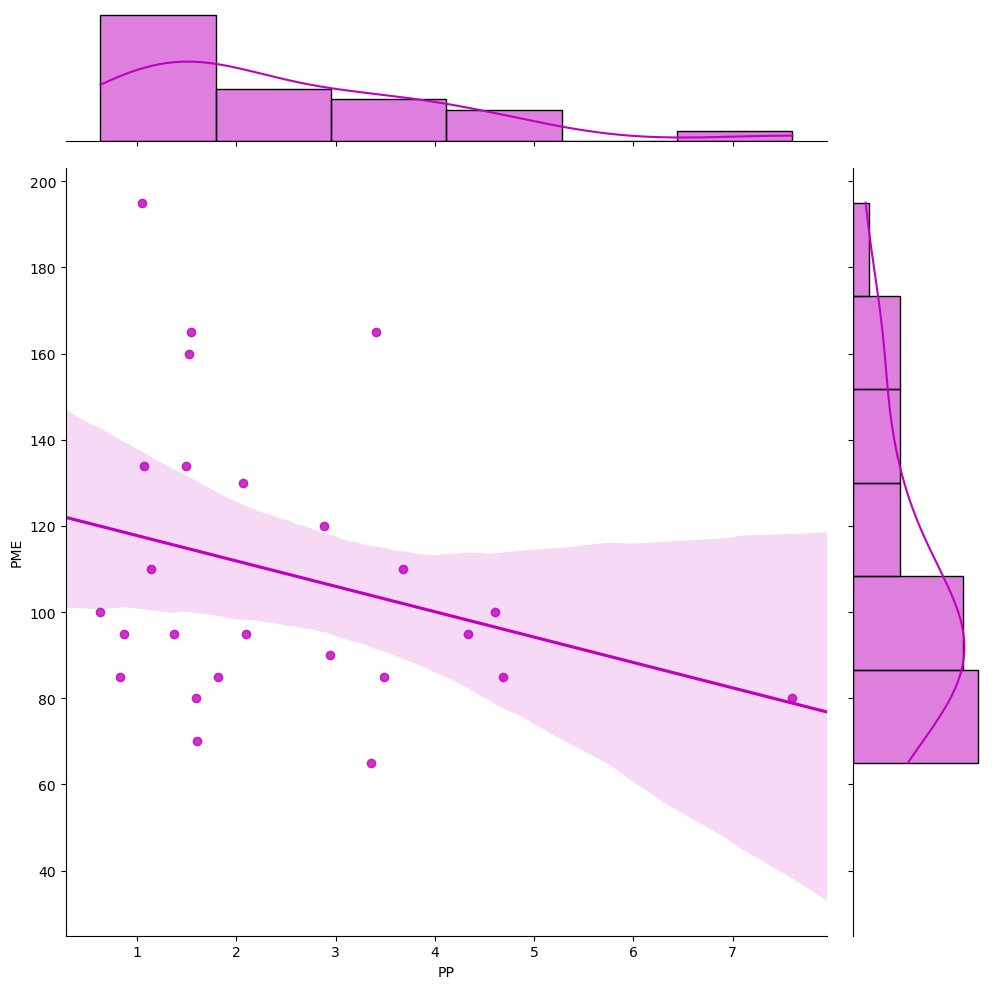

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sb.scatterplot(data=dados, x='PP', y='PME', hue="gen_oft", ax=ax)
sb.jointplot(data=dados, x='PP', y='PME', kind='reg', truncate=False, color="m", height=10)

In [68]:
dados.head()

Idade  Gen  OFT  Altura  Peso  PorMC      VR   CP  PME  gen_oft        imc  \
0      7    0    1     109  13.1     68  24.510  137   95        1  11.026008   
1      7    1    1     112  12.9     65  38.165  134   85        3  10.283801   
2      8    0    1     124  14.1     64  44.100  147  100        1   9.170135   
3      8    1    1     125  16.2     67  19.890  124   85        3  10.368000   
4      8    0    1     127  21.5     93  19.190  104   95        1  13.330027   

         PP  
0  1.377063  
1  0.826146  
2  0.631836  
3  1.820091  
4  4.333687

### Preparando os dados:

- [Volto para o Sumário!](#Sumário:)


- Vamos remover as variáveis criadas, para trabalharmos numa versão de modelo somente com as variáveis brutas trazidas no início;

In [69]:
dados.head()

Idade  Gen  OFT  Altura  Peso  PorMC      VR   CP  PME  gen_oft        imc  \
0      7    0    1     109  13.1     68  24.510  137   95        1  11.026008   
1      7    1    1     112  12.9     65  38.165  134   85        3  10.283801   
2      8    0    1     124  14.1     64  44.100  147  100        1   9.170135   
3      8    1    1     125  16.2     67  19.890  124   85        3  10.368000   
4      8    0    1     127  21.5     93  19.190  104   95        1  13.330027   

         PP  
0  1.377063  
1  0.826146  
2  0.631836  
3  1.820091  
4  4.333687

In [70]:
dados_modelo_geral = dados.iloc[:,:-3]

#### Aplicando variáveis dummy:
- A princípio, como vamos testar modelos distintos, vamos manter todas as variáveis;
- Vamos dummyzar as variáveis Gen e OFT, pois queremos saber como seria um modelo considerando todas elas;

- Poderíamos realizar a dummização da variável, da seguinte forma:

- Dummy na variável Gen:

In [71]:
gen_dummy = pd.get_dummies(dados_modelo_geral.Gen, prefix='gen', dtype=float)

gen_dummy

gen_0  gen_1
0     1.0    0.0
1     0.0    1.0
2     1.0    0.0
3     0.0    1.0
4     1.0    0.0
5     1.0    0.0
6     0.0    1.0
7     0.0    1.0
8     1.0    0.0
9     0.0    1.0
10    1.0    0.0
11    0.0    1.0
12    1.0    0.0
13    0.0    1.0
14    0.0    1.0
15    0.0    1.0
16    1.0    0.0
17    0.0    1.0
18    1.0    0.0
19    0.0    1.0
20    1.0    0.0
21    1.0    0.0
22    1.0    0.0
23    1.0    0.0
24    1.0    0.0

In [72]:
dados_modelo_geral = dados_modelo_geral.drop(columns=['Gen'])
dados_modelo_geral = pd.concat([gen_dummy, dados_modelo_geral], axis=1)

dados_modelo_geral.head()

gen_0  gen_1  Idade  OFT  Altura  Peso  PorMC      VR   CP  PME
0    1.0    0.0      7    1     109  13.1     68  24.510  137   95
1    0.0    1.0      7    1     112  12.9     65  38.165  134   85
2    1.0    0.0      8    1     124  14.1     64  44.100  147  100
3    0.0    1.0      8    1     125  16.2     67  19.890  124   85
4    1.0    0.0      8    1     127  21.5     93  19.190  104   95

- Dummy na variável OFT:

In [73]:
oft_dummy = pd.get_dummies(dados_modelo_geral.OFT, prefix='oft', dtype=float)

oft_dummy

oft_0  oft_1
0     0.0    1.0
1     0.0    1.0
2     0.0    1.0
3     0.0    1.0
4     0.0    1.0
5     0.0    1.0
6     1.0    0.0
7     0.0    1.0
8     1.0    0.0
9     0.0    1.0
10    0.0    1.0
11    0.0    1.0
12    0.0    1.0
13    0.0    1.0
14    0.0    1.0
15    1.0    0.0
16    1.0    0.0
17    1.0    0.0
18    0.0    1.0
19    1.0    0.0
20    0.0    1.0
21    0.0    1.0
22    0.0    1.0
23    0.0    1.0
24    0.0    1.0

In [74]:
dados_modelo_geral = dados_modelo_geral.drop(columns=['OFT'])
dados_modelo_geral = pd.concat([oft_dummy, dados_modelo_geral], axis=1)

dados_modelo_geral.head()

oft_0  oft_1  gen_0  gen_1  Idade  Altura  Peso  PorMC      VR   CP  PME
0    0.0    1.0    1.0    0.0      7     109  13.1     68  24.510  137   95
1    0.0    1.0    0.0    1.0      7     112  12.9     65  38.165  134   85
2    0.0    1.0    1.0    0.0      8     124  14.1     64  44.100  147  100
3    0.0    1.0    0.0    1.0      8     125  16.2     67  19.890  124   85
4    0.0    1.0    1.0    0.0      8     127  21.5     93  19.190  104   95

In [75]:
# convertendo tudo para numérico
dados_modelo_geral = dados_modelo_geral.astype(float)
dados_modelo_geral.head()

oft_0  oft_1  gen_0  gen_1  Idade  Altura  Peso  PorMC      VR     CP  \
0    0.0    1.0    1.0    0.0    7.0   109.0  13.1   68.0  24.510  137.0   
1    0.0    1.0    0.0    1.0    7.0   112.0  12.9   65.0  38.165  134.0   
2    0.0    1.0    1.0    0.0    8.0   124.0  14.1   64.0  44.100  147.0   
3    0.0    1.0    0.0    1.0    8.0   125.0  16.2   67.0  19.890  124.0   
4    0.0    1.0    1.0    0.0    8.0   127.0  21.5   93.0  19.190  104.0   

     PME  
0   95.0  
1   85.0  
2  100.0  
3   85.0  
4   95.0

#### Aplicanto transformações nas variáveis da regressão:

#### Aplicando a padronização nos dados:

- Vamos aplicar padronização standartscaler de dados:
    - Para cada uma das colunas, vamos aplicar a transformação: $$Z_{coluna} = \frac{X_i-\mu_X}{\sigma}$$

- [Volto para o Sumário!](#Sumário:)

### Gerando modelos:

- [Volto para o Sumário!](#Sumário:)

In [76]:
X = dados_modelo_geral.iloc[:,:-1].values
X = sm.add_constant(X)
y = dados_modelo_geral.PME.values

In [77]:
RegModel = sm.OLS(y, X, hasconst=True)

In [78]:
RegModelAjustado = RegModel.fit()

- [Volto para o Sumário!](#Sumário:)

### Checando supostos dos modelos:


- [Volto para o Sumário!](#Sumário:)

- Vamos encontrar os resíduos do modelo:

In [79]:
dados_residuos = pd.DataFrame({'nota_real':y,'nota_pred':RegModelAjustado.predict(X)})
dados_residuos['residuo'] = dados_residuos['nota_pred'] - dados_residuos['nota_real']
dados_residuos.head()

nota_real   nota_pred    residuo
0       95.0   83.442176 -11.557824
1       85.0   96.707411  11.707411
2      100.0  120.729533  20.729533
3       85.0   56.691138 -28.308862
4       95.0   75.250040 -19.749960

In [80]:
dados_residuos = dados_residuos.reset_index()

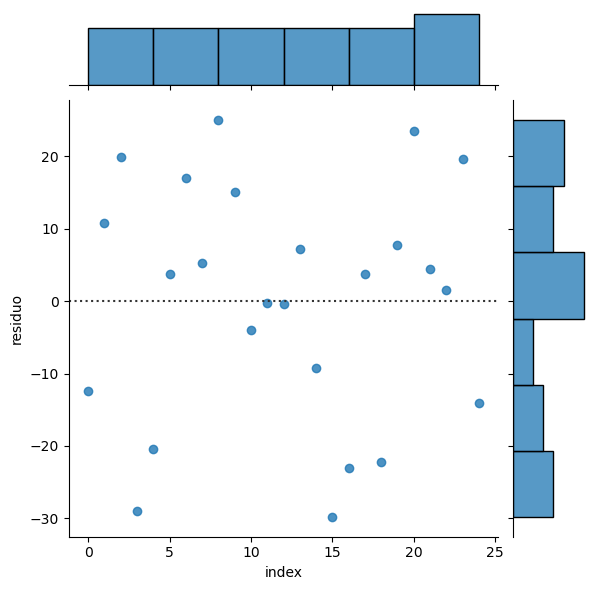

In [81]:
sb.jointplot(data=dados_residuos, x='index', y='residuo', kind='resid')

- Normalidade dos resíduos:

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


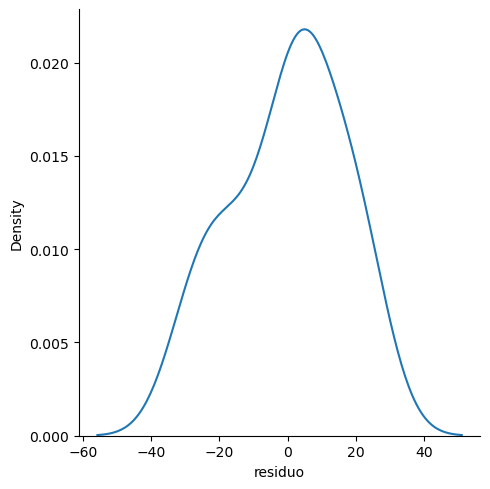

In [82]:
sb.displot(data=dados_residuos.residuo, kind='kde')

- Vamos testar com 3 testes de hipótese:
    - Shapiro Wilk Test concluímos que não é normal;
    - Anderson Darling Test concluímos que é normal;
    - Test KS concluímos que é normal;
    - QQ-Plot concluímos que não é normal;

In [83]:
st.shapiro(dados_residuos.residuo)

ShapiroResult(statistic=0.9530877470970154, pvalue=0.29394420981407166)

In [84]:
st.anderson(dados_residuos.residuo, dist='norm')

AndersonResult(statistic=0.3715037331350324, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-2.348770067328587e-12, scale=16.361305006327434)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [85]:
st.kstest(dados_residuos.residuo, st.norm.cdf)

KstestResult(statistic=0.519649387607755, pvalue=8.34390843889628e-07, statistic_location=3.389099821717039, statistic_sign=-1)

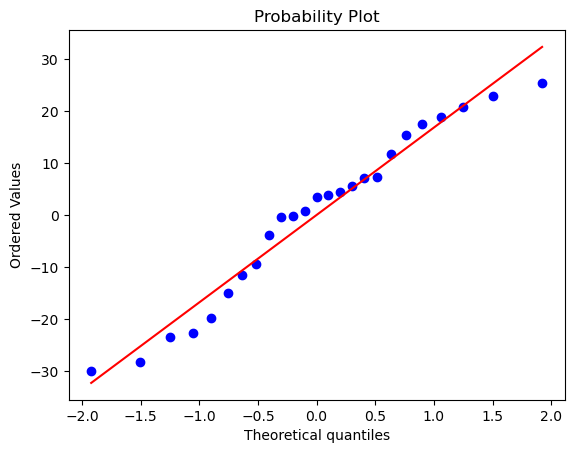

In [86]:
st.probplot(dados_residuos.residuo, dist="norm", plot=pylab)
pylab.show()

- Vamos usar teste de Bartlett e Levene:
    - Parece que temos homogeneidade nos resíduos;

In [87]:
res = st.bartlett(dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False))
res

BartlettResult(statistic=0.33153848176632233, pvalue=0.8472417203845664)

In [88]:
res = st.levene(dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False))
res

LeveneResult(statistic=0.0560788754832829, pvalue=0.9455544606774062)

- Abaixo vemos que no segundo sumário do modelo:
    - Durbin-Watson:	1.564
    - Parece existir uma pequena autocorrelação positiva;

In [89]:
RegModelAjustado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.641   
Dependent Variable: y                AIC:                227.6723
Date:               2024-09-08 17:52 BIC:                238.6422
No. Observations:   25               Log-Likelihood:     -104.84 
Df Model:           8                F-statistic:        6.353   
Df Residuals:       16               Prob (F-statistic): 0.000872
R-squared:          0.761            Scale:              401.54  
-------------------------------------------------------------------
         Coef.    Std.Err.      t      P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const   55.0334    68.0946    0.8082   0.4308   -89.3207   199.3875
x1      33.9818    35.9031    0.9465   0.3580   -42.1294   110.0930
x2      21.0516    33.0209    0.6375   0.5328   -48.9497    91.0528
x3      35.9735    34.9861    1.0282   0.3191   -38.1937   110.1407
x4      19.0599    33.6770    0.5660   0.5793   -52.3321    90.4518
x5      -0.6661     3.0681   -0.2171   0.8309    -7.1701     5.8379
x6      -0.4977     0.7379   -0.6745   0.5096    -2.0619     1.0665
x7       2.0527     1.4641    1.4020   0.1800    -1.0511     5.1565
x8      -0.3936     0.8834   -0.4456   0.6618    -2.2663     1.4790
x9       2.2240     0.6469    3.4382   0.0034     0.8527     3.5953
x10     -0.1777     0.2537   -0.7004   0.4938    -0.7154     0.3601
-----------------------------------------------------------------
Omnibus:          1.907   Durbin-Watson:      1.564              
Prob(Omnibus):    0.385   Jarque-Bera (JB):   1.310              
Skew:             0.314   Prob(JB):           0.519              
Kurtosis:         2.071   Condition No.:      2711514322109845504
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-31. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""

- <b>VIF</b>

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dados.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dados.values, i)
                          for i in range(len(dados.columns))]

print(vif_data)

    feature          VIF
0     Idade   161.947454
1       Gen          inf
2       OFT          inf
3    Altura   268.797813
4      Peso   214.131792
5     PorMC   634.309491
6        VR    44.249675
7        CP    69.014849
8       PME    53.172597
9   gen_oft          inf
10      imc  1470.788157
11       PP    30.305001


C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- <b>Determinante de X:</b>
    - $det(X)\cong0$
    - -7.483165409374131e-37
    - Há uma forte multicolinearidade, como esperado, dado as interações;

In [92]:
dados.shape

(25, 12)

In [93]:
corr = np.corrcoef(dados, rowvar=0)

np.linalg.det(corr)

-1.7591274542098351e-23

- <b>COOK DISTANCE:</b>

In [94]:
model_influence = RegModelAjustado.get_influence()

In [95]:
cook_distance = model_influence.cooks_distance

(-0.2, 1.25)

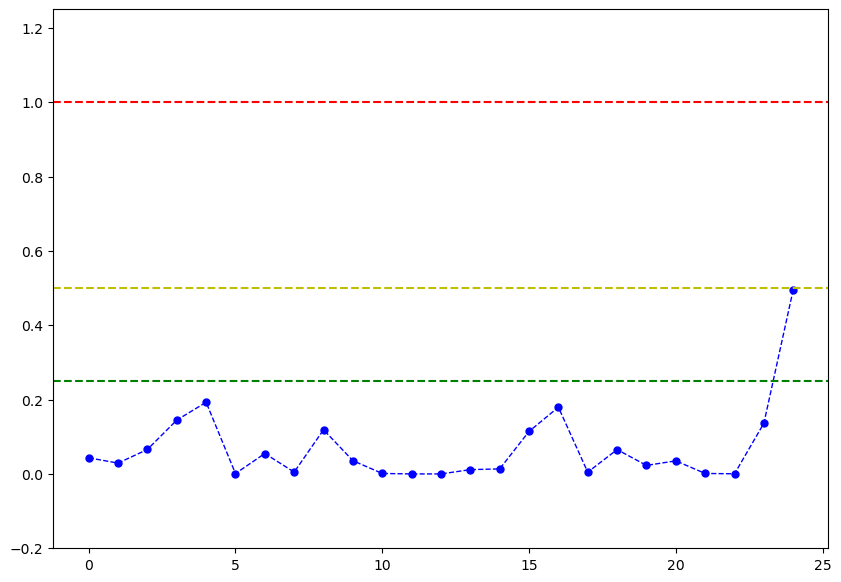

In [96]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(cook_distance[0], color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=5)
ax.axhline(y=1, color='r', linestyle='--')
ax.axhline(y=0.5, color='y', linestyle='--')
ax.axhline(y=0.25, color='g', linestyle='--')
ax.set_ylim([-0.2, 1.25])

- <b>RESIDUAIS STUDENTIZADOS:</b>

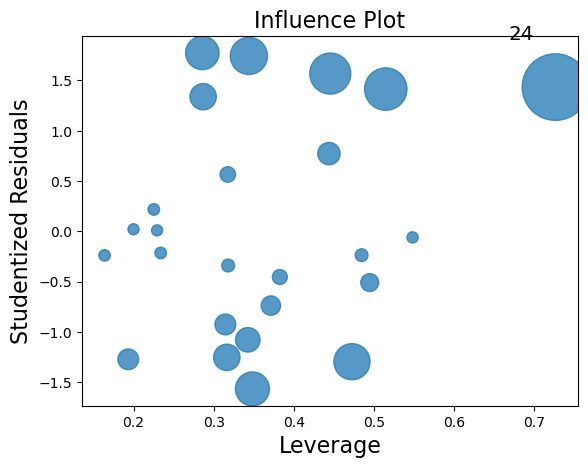

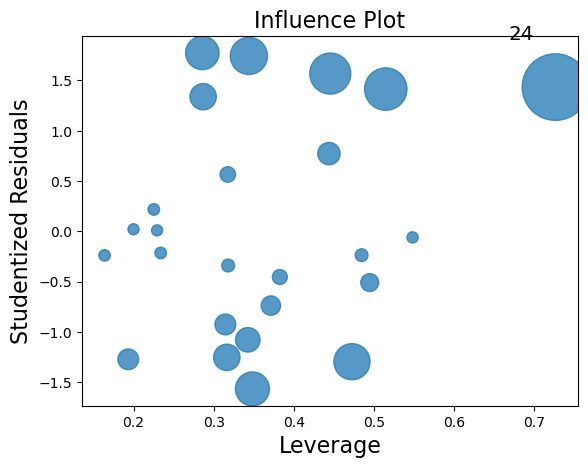

In [97]:
model_influence.plot_influence()

In [98]:
model_influence.get_resid_studentized_external()

array([ 0.77327014, -0.73678447, -1.25104276,  1.74387832,  1.41451951,
       -0.23765762, -1.07714417, -0.33883015, -1.56473114, -0.92420664,
        0.21843423,  0.01088725,  0.02184532, -0.45279492,  0.56620898,
        1.77367932,  1.56844389, -0.23552646,  1.33869174, -0.50822711,
       -1.27065792, -0.21369962, -0.05940994, -1.29425709,  1.43437888])

- [Volto para o Sumário!](#Sumário:)

In [99]:
dados_modelo_geral.head()

oft_0  oft_1  gen_0  gen_1  Idade  Altura  Peso  PorMC      VR     CP  \
0    0.0    1.0    1.0    0.0    7.0   109.0  13.1   68.0  24.510  137.0   
1    0.0    1.0    0.0    1.0    7.0   112.0  12.9   65.0  38.165  134.0   
2    0.0    1.0    1.0    0.0    8.0   124.0  14.1   64.0  44.100  147.0   
3    0.0    1.0    0.0    1.0    8.0   125.0  16.2   67.0  19.890  124.0   
4    0.0    1.0    1.0    0.0    8.0   127.0  21.5   93.0  19.190  104.0   

     PME  
0   95.0  
1   85.0  
2  100.0  
3   85.0  
4   95.0

In [100]:
RegModelAjustado.params

array([55.03335829, 33.98179981, 21.05155848, 35.9734931 , 19.05986518,
       -0.66608592, -0.49768565,  2.05270032, -0.39364918,  2.22398842,
       -0.17765024])

- Coeficientes:
    - Constante: $B_0=55.03335829$
    - oft_0: $B_1=33.98179981$
    - oft_1: $B_2=21.05155848$
    - gen_0: $B_3=35.9734931$
    - gen_1: $B_4=19.05986518$
    - Idade: $B_5=-0.66608592$
    - Altura: $B_6=-0.49768565$
    - Peso: $B_7=2.05270032$
    - PorMC: $B_8=-0.39364918$
    - VR: $B_9=2.22398842$
    - CP: $B_{10}=-0.17765024$

$$\hat{Y}_{PME} = b_0 + b_1X_{oft_0} + b_2X_{oft_1} + b_3X_{gen_0} + b_4X_{gen_1} + b_5X_{Idade} + b_6X_{Altura} + b_7X_{Peso} + b_8X_{PorMC} + b_9X_{VR} + b_{10}X_{CP}$$

$$\hat{Y}_{PME} = 55.03335829 + 33.98X_{oft_0} + 21.05X_{oft_1} + 35.97X_{gen_0} + 19.05X_{gen_1} + −0.666X_{Idade} + −0.497X_{Altura} + 2.05X_{Peso} + −0.39X_{PorMC} + 2.22X_{VR} + −0.17X_{CP}$$

- Testando a hipótese de $H_0: B_i=0$ ou $H_1: B_i\neq0$ para qualquer $i$ nas variáveis:
    - F=1437.0446059746448
    - p=5.167295913444707e-273
    - Rejeitamos $H_0$.

In [101]:
RegModelAjustado.f_test(np.identity(11))

C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 9
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=88.01907401935613, p=6.471572194268111e-12, df_denom=16, df_num=9>

- Quais os intervalos de coenfiança para cada um dos coeficientes?

In [102]:
RegModelAjustado.t_test(np.identity(11))

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            55.0334     68.095      0.808      0.431     -89.321     199.387
c1            33.9818     35.903      0.946      0.358     -42.129     110.093
c2            21.0516     33.021      0.638      0.533     -48.950      91.053
c3            35.9735     34.986      1.028      0.319     -38.194     110.141
c4            19.0599     33.677      0.566      0.579     -52.332      90.452
c5            -0.6661      3.068     -0.217      0.831      -7.170       5.838
c6            -0.4977      0.738     -0.674      0.510      -2.062       1.067
c7             2.0527      1.464      1.402      0.180      -1.051       5.157
c8            -0.3936      0.883     -0.446      0.662      -2.266       1.479

- Abaixo temos um sumário de todos os testes estatísticos:

In [103]:
print(RegModelAjustado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     6.353
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           0.000872
Time:                        17:52:40   Log-Likelihood:                -104.84
No. Observations:                  25   AIC:                             227.7
Df Residuals:                      16   BIC:                             238.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.0334     68.095      0.808      0.4

- [Volto para o Sumário!](#Sumário:)

### Selecionando o modelo vencedor:

- Código disponível no Jupyter notebook;
- Este jupyter estará disponível em HTML;

- [Volto para o Sumário!](#Sumário:)

In [104]:
dados.head()

Idade  Gen  OFT  Altura  Peso  PorMC      VR   CP  PME  gen_oft        imc  \
0      7    0    1     109  13.1     68  24.510  137   95        1  11.026008   
1      7    1    1     112  12.9     65  38.165  134   85        3  10.283801   
2      8    0    1     124  14.1     64  44.100  147  100        1   9.170135   
3      8    1    1     125  16.2     67  19.890  124   85        3  10.368000   
4      8    0    1     127  21.5     93  19.190  104   95        1  13.330027   

         PP  
0  1.377063  
1  0.826146  
2  0.631836  
3  1.820091  
4  4.333687

- Ordem das variáveis:

In [105]:
colunas = ['PP', 'imc', 'gen_oft', 'Idade', 'Gen', 'OFT', 'Altura', 'Peso', 'PorMC', 'VR', 'CP', 'PME']

In [106]:
dados = dados.loc[:, colunas]

- Aplicando aprendizados:
    - Remover idade;
    - Usar PP;
        - PorMC, VR e CP;
    - Usar imc;
        - Remover Altura e Peso;
    - Usar dummy de gen_oft;
        - Quebrar em 4 grupos e usar a variável sem dommyzar;
    - Deletar outlier, 24° linha de dados;

In [109]:
dados_finais = dados.iloc[:-1,[0,1,2,-1]]

- Vamos olhar para todos os dados e realizar uma busca pelo melhor modelos executando combinações de variáveis:
    - $2^{P}-1 = combinações$

In [135]:
def calcula_f_modelo(df, col_vars=['','',''], col_pred=''):
    
    """Função que computa F para um modelo."""
    
    X = df.loc[:,col_vars].values
    X = sm.add_constant(X)
    y = df[col_pred].values

    RegModel = sm.OLS(y, X, hasconst=True)

    RegModelAjustado = RegModel.fit()

    result = RegModelAjustado.f_test(np.identity(X.shape[1]))

    return result.fvalue

In [137]:
calcula_f_modelo(df=dados_finais, col_vars=['PP', 'imc', 'gen_oft'], col_pred='PME')

168.68502077278373

### Modelo final:

- Código disponível no Jupyter notebook;
- Este jupyter estará disponível em HTML;

- [Volto para o Sumário!](#Sumário:)

- Dando uma olhada final nos dados:

In [166]:
dados_finais.head()

PP        imc  gen_oft  PME
0  1.377063  11.026008        1   95
1  0.826146  10.283801        3   85
2  0.631836   9.170135        1  100
3  1.820091  10.368000        3   85
4  4.333687  13.330027        1   95

In [167]:
import plotly.express as px

fig = px.scatter_3d(dados_finais, x='PP', y='imc', z='PME', color='gen_oft')

fig.show()

- Gerando modelo final:

In [139]:
X = dados_finais.iloc[:,:-1].values
X = sm.add_constant(X)
y = dados_finais.PME.values

In [140]:
RegModel = sm.OLS(y, X, hasconst=True)

In [141]:
RegModelAjustado = RegModel.fit()

- Vamos encontrar os resíduos do modelo:

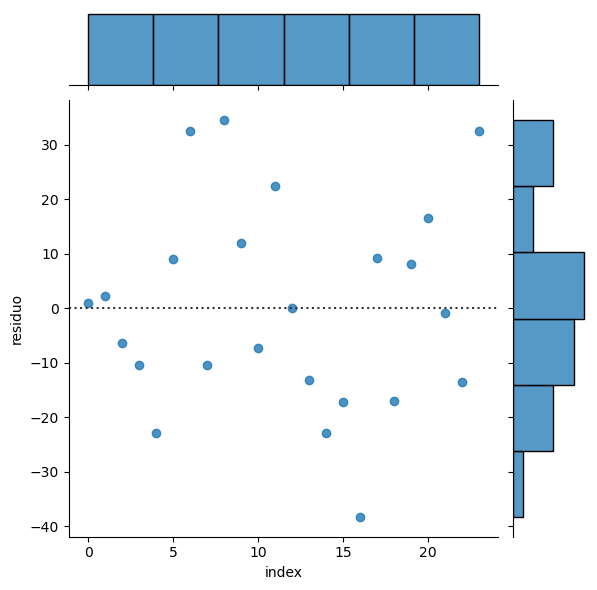

In [143]:
dados_residuos = pd.DataFrame({'nota_real':y,'nota_pred':RegModelAjustado.predict(X)})
dados_residuos['residuo'] = dados_residuos['nota_pred'] - dados_residuos['nota_real']

dados_residuos = dados_residuos.reset_index()

sb.jointplot(data=dados_residuos, x='index', y='residuo', kind='resid')

- Normalidade dos resíduos:

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


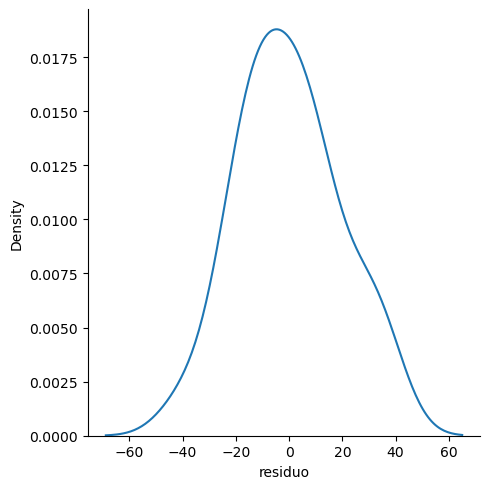

In [144]:
sb.displot(data=dados_residuos.residuo, kind='kde')

- Vamos testar com 3 testes de hipótese:
    - Shapiro Wilk Test concluímos que é normal;
    - Anderson Darling Test concluímos que é normal;
    - Test KS concluímos que é normal;
    - QQ-Plot concluímos que é normal;

In [145]:
st.shapiro(dados_residuos.residuo)

ShapiroResult(statistic=0.9760119915008545, pvalue=0.8126245737075806)

In [146]:
st.anderson(dados_residuos.residuo, dist='norm')

AndersonResult(statistic=0.2014175990753131, critical_values=array([0.513, 0.584, 0.701, 0.817, 0.972]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.322468309207276e-14, scale=18.93617949176917)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [147]:
st.kstest(dados_residuos.residuo, st.norm.cdf)

KstestResult(statistic=0.4720119688772429, pvalue=1.984674760293646e-05, statistic_location=-1.91122196555159, statistic_sign=1)

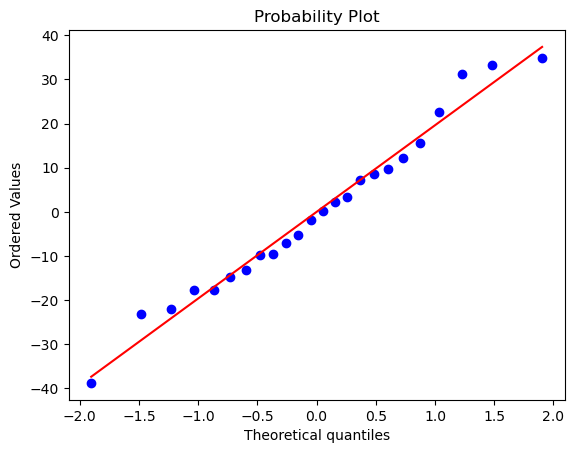

In [148]:
st.probplot(dados_residuos.residuo, dist="norm", plot=pylab)
pylab.show()

- Vamos usar teste de Bartlett e Levene:
    - Parece que temos homogeneidade nos resíduos;

In [149]:
res = st.bartlett(dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False))
res

BartlettResult(statistic=0.1407574846470417, pvalue=0.932040749769683)

In [150]:
res = st.levene(dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False))
res

LeveneResult(statistic=0.268747286607213, pvalue=0.7659930933466538)

- Abaixo vemos que no segundo sumário do modelo:
    - Durbin-Watson:	1.806
    - Parece existir uma pequena autocorrelação positiva;

In [151]:
RegModelAjustado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.505   
Dependent Variable: y                AIC:                216.2592
Date:               2024-09-08 18:21 BIC:                220.9714
No. Observations:   24               Log-Likelihood:     -104.13 
Df Model:           3                F-statistic:        8.813   
Df Residuals:       20               Prob (F-statistic): 0.000633
R-squared:          0.569            Scale:              412.37  
-------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    46.0477    20.4478    2.2520   0.0357     3.3944   88.7010
x1      -13.5235     3.2944   -4.1050   0.0006   -20.3955   -6.6516
x2        6.8435     1.4842    4.6108   0.0002     3.7475    9.9395
x3       -5.6138     4.2131   -1.3325   0.1977   -14.4023    3.1746
-----------------------------------------------------------------
Omnibus:               0.231        Durbin-Watson:          1.806
Prob(Omnibus):         0.891        Jarque-Bera (JB):       0.387
Skew:                  -0.185       Prob(JB):               0.824
Kurtosis:              2.500        Condition No.:          79   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

- <b>VIF</b>

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dados_finais.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dados_finais.values, i)
                          for i in range(len(dados_finais.columns))]

print(vif_data)

   feature        VIF
0       PP  10.311612
1      imc  60.449950
2  gen_oft   3.292448
3      PME  27.710510


- <b>Determinante de X:</b>
    - $det(X)\cong0$
    - Multicolinearidade foi bem reduzida;

In [155]:
dados_finais.shape

(24, 4)

In [156]:
corr = np.corrcoef(dados_finais, rowvar=0)

np.linalg.det(corr)

0.26211482955079807

- <b>COOK DISTANCE:</b>

In [157]:
model_influence = RegModelAjustado.get_influence()

In [158]:
cook_distance = model_influence.cooks_distance

(-0.2, 1.25)

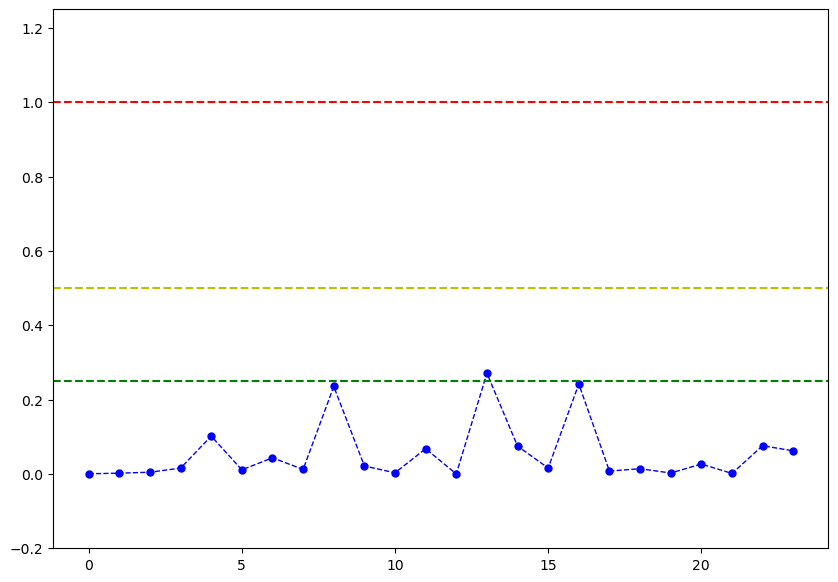

In [159]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(cook_distance[0], color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=5)
ax.axhline(y=1, color='r', linestyle='--')
ax.axhline(y=0.5, color='y', linestyle='--')
ax.axhline(y=0.25, color='g', linestyle='--')
ax.set_ylim([-0.2, 1.25])

- <b>RESIDUAIS STUDENTIZADOS:</b>

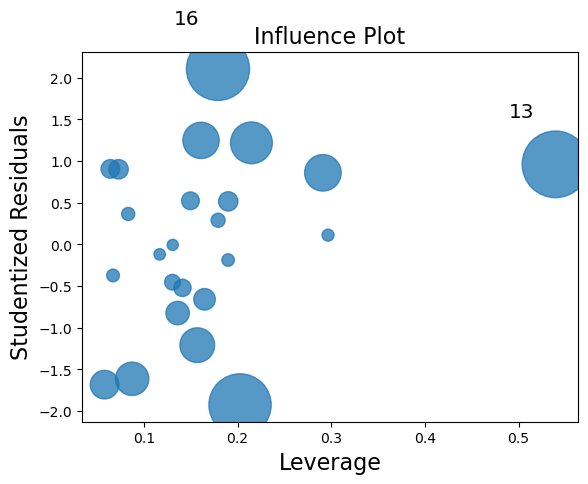

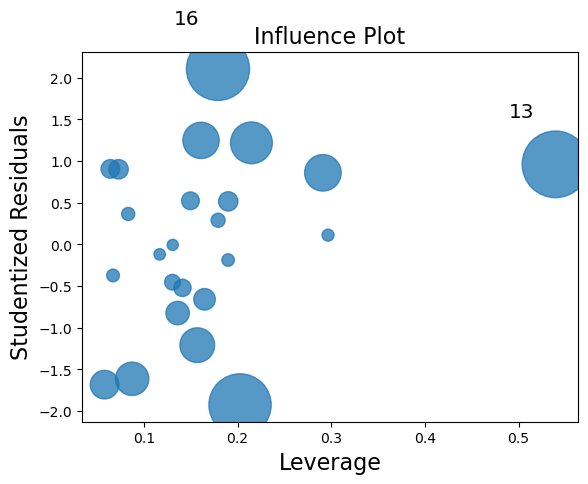

In [160]:
model_influence.plot_influence()

In [161]:
model_influence.get_resid_studentized_external()

array([-0.11881635, -0.18661516,  0.29104353,  0.51727445,  1.21970464,
       -0.52023657, -1.68199261,  0.52406264, -1.92537543, -0.65809867,
        0.36638426, -1.20800805, -0.00485365,  0.9617875 ,  1.24917069,
        0.90234779,  2.10673346, -0.45253223,  0.90716434, -0.37158054,
       -0.8227887 ,  0.11221234,  0.85998188, -1.61192352])

- [Volto para o Sumário!](#Sumário:)

In [162]:
RegModelAjustado.params

array([ 46.04772563, -13.52352336,   6.84350306,  -5.61383808])

- Coeficientes:
    - Constante: $B_0=46.04772563$
    - pp: $B_1=-13.52352336$
    - imc: $B_2=6.84350306$
    - gen_oft: $B_3=-5.61383808$

$$\hat{Y}_{PME} = b_0 + b_1X_{PP} + b_2X_{IMC} + b_3X_{gen\_oft}$$

$$\hat{Y}_{PME} = 46.04772563 −13.52352336X_{PP} + 6.84350306X_{IMC} −5.61383808X_{gen\_oft}$$

- Aonde PP é:
$$PP=\frac{PorMC^{2}}{VR*CP}$$

- E IMC é:
$$IMC = \frac{Peso}{Altura^{2}}$$

- Testando a hipótese de $H_0: B_i=0$ ou $H_1: B_i\neq0$ para qualquer $i$ nas variáveis:
    - Rejeitamos $H_0$.

In [163]:
RegModelAjustado.f_test(np.identity(4))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=168.68502077278373, p=4.18747210302063e-15, df_denom=20, df_num=4>

- Quais os intervalos de coenfiança para cada um dos coeficientes?

In [164]:
RegModelAjustado.t_test(np.identity(4))

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            46.0477     20.448      2.252      0.036       3.394      88.701
c1           -13.5235      3.294     -4.105      0.001     -20.395      -6.652
c2             6.8435      1.484      4.611      0.000       3.747       9.940
c3            -5.6138      4.213     -1.332      0.198     -14.402       3.175

- Abaixo temos um sumário de todos os testes estatísticos:

In [165]:
print(RegModelAjustado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     8.813
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           0.000633
Time:                        18:29:03   Log-Likelihood:                -104.13
No. Observations:                  24   AIC:                             216.3
Df Residuals:                      20   BIC:                             221.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0477     20.448      2.252      0.0

- [Volto para o Sumário!](#Sumário:)

### Conclusão:

- Código disponível no Jupyter notebook;
- Este jupyter estará disponível em HTML;

- [Volto para o Sumário!](#Sumário:)

----------